# BATDOG <a class="tocSkip">

### *The <font color=red>B</font>ayesian <font color=red>A</font>s<font color=red>t</font>rometric <font color=red>D</font>ust Cart<font color=red>og</font>rapher* <a class="tocSkip">

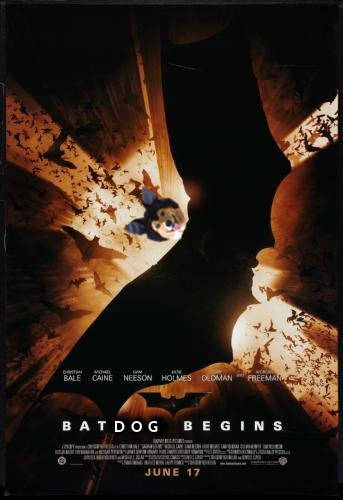

**A Python notebook for processing of parallaxes, comparison with variable star distances and inference of line of sight interstellar extinction to said variable stars.**

This notebook was developed with Table of Contents 2, a Jupyter notebook extension that makes navigating between sections of the code significantly easier. It is strongly recommended that you install this extension. Some details about how to do this can be found here: https://ndres.me/post/best-jupyter-notebook-extensions/ (remember to restart Jupyter after installing nbextensions)

------

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-dependencies" data-toc-modified-id="Imports-and-dependencies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and dependencies</a></span></li><li><span><a href="#Loading-of-data" data-toc-modified-id="Loading-of-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading of data</a></span><ul class="toc-item"><li><span><a href="#Define-PLR-relation-convenience-functions" data-toc-modified-id="Define-PLR-relation-convenience-functions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Define PLR relation convenience functions</a></span></li><li><span><a href="#Setup-a-fake-distribution-of-stars" data-toc-modified-id="Setup-a-fake-distribution-of-stars-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Setup a fake distribution of stars</a></span></li><li><span><a href="#Set-the-numpy-random-seed" data-toc-modified-id="Set-the-numpy-random-seed-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Set the numpy random seed</a></span></li><li><span><a href="#Setup-of-the-stars-to-infer-dust-to" data-toc-modified-id="Setup-of-the-stars-to-infer-dust-to-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Setup of the stars to infer dust to</a></span><ul class="toc-item"><li><span><a href="#Sample-some-fake-variable-stars-from-the-stellar-distribution" data-toc-modified-id="Sample-some-fake-variable-stars-from-the-stellar-distribution-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Sample some fake variable stars from the stellar distribution</a></span></li><li><span><a href="#Model-experimental-parameters-for-the-fake-stars" data-toc-modified-id="Model-experimental-parameters-for-the-fake-stars-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Model experimental parameters for the fake stars</a></span></li></ul></li><li><span><a href="#Setup-of-the-prior-stars" data-toc-modified-id="Setup-of-the-prior-stars-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Setup of the prior stars</a></span><ul class="toc-item"><li><span><a href="#Sample-some-fake-stars" data-toc-modified-id="Sample-some-fake-stars-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Sample some fake stars</a></span></li><li><span><a href="#Define-a-ParallaxPrior-class" data-toc-modified-id="Define-a-ParallaxPrior-class-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Define a ParallaxPrior class</a></span></li><li><span><a href="#Initialise-the-ParallaxPrior-class" data-toc-modified-id="Initialise-the-ParallaxPrior-class-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Initialise the ParallaxPrior class</a></span></li></ul></li><li><span><a href="#Setup-of-omega_0-constraining-binary-stars" data-toc-modified-id="Setup-of-omega_0-constraining-binary-stars-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Setup of omega_0 constraining binary stars</a></span></li></ul></li><li><span><a href="#Setup-of-likelihood-&amp;-priors" data-toc-modified-id="Setup-of-likelihood-&amp;-priors-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Setup of likelihood &amp; priors</a></span><ul class="toc-item"><li><span><a href="#A-debug-helper-function" data-toc-modified-id="A-debug-helper-function-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>A debug helper function</a></span></li><li><span><a href="#Priors" data-toc-modified-id="Priors-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Priors</a></span><ul class="toc-item"><li><span><a href="#Prior-on-extinction" data-toc-modified-id="Prior-on-extinction-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Prior on extinction</a></span></li><li><span><a href="#Prior-on-PLR-parameters" data-toc-modified-id="Prior-on-PLR-parameters-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Prior on PLR parameters</a></span></li><li><span><a href="#Parallax-priors" data-toc-modified-id="Parallax-priors-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Parallax priors</a></span><ul class="toc-item"><li><span><a href="#Prior-on-variable-star-parallax" data-toc-modified-id="Prior-on-variable-star-parallax-3.2.3.1"><span class="toc-item-num">3.2.3.1&nbsp;&nbsp;</span>Prior on variable star parallax</a></span></li><li><span><a href="#Prior-on-binary-star-parallax" data-toc-modified-id="Prior-on-binary-star-parallax-3.2.3.2"><span class="toc-item-num">3.2.3.2&nbsp;&nbsp;</span>Prior on binary star parallax</a></span></li><li><span><a href="#Prior-on-parallax-offset" data-toc-modified-id="Prior-on-parallax-offset-3.2.3.3"><span class="toc-item-num">3.2.3.3&nbsp;&nbsp;</span>Prior on parallax offset</a></span></li></ul></li><li><span><a href="#Prior-on-scale-length" data-toc-modified-id="Prior-on-scale-length-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Prior on scale length</a></span></li><li><span><a href="#Logarithmic-priors-combination" data-toc-modified-id="Logarithmic-priors-combination-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Logarithmic priors combination</a></span></li></ul></li><li><span><a href="#Likelihood-function" data-toc-modified-id="Likelihood-function-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Likelihood function</a></span><ul class="toc-item"><li><span><a href="#Parallax-likelihoods" data-toc-modified-id="Parallax-likelihoods-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Parallax likelihoods</a></span><ul class="toc-item"><li><span><a href="#For-variable-stars" data-toc-modified-id="For-variable-stars-3.3.1.1"><span class="toc-item-num">3.3.1.1&nbsp;&nbsp;</span>For variable stars</a></span></li><li><span><a href="#For-binary-stars---Gaia-measurements" data-toc-modified-id="For-binary-stars---Gaia-measurements-3.3.1.2"><span class="toc-item-num">3.3.1.2&nbsp;&nbsp;</span>For binary stars - Gaia measurements</a></span></li><li><span><a href="#For-binary-stars---external-measurements" data-toc-modified-id="For-binary-stars---external-measurements-3.3.1.3"><span class="toc-item-num">3.3.1.3&nbsp;&nbsp;</span>For binary stars - external measurements</a></span></li></ul></li><li><span><a href="#Likelihood-of-period-data" data-toc-modified-id="Likelihood-of-period-data-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Likelihood of period data</a></span></li><li><span><a href="#Likelihood-of-apparent-magnitude-data" data-toc-modified-id="Likelihood-of-apparent-magnitude-data-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Likelihood of apparent magnitude data</a></span></li><li><span><a href="#Probability-of-the-nuisance-magnitude-parameters" data-toc-modified-id="Probability-of-the-nuisance-magnitude-parameters-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Probability of the nuisance magnitude parameters</a></span></li><li><span><a href="#Logarithmic-likelihoods-combination" data-toc-modified-id="Logarithmic-likelihoods-combination-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Logarithmic likelihoods combination</a></span></li></ul></li><li><span><a href="#Posterior" data-toc-modified-id="Posterior-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Posterior</a></span></li></ul></li><li><span><a href="#Creation-of-a-starting-guess" data-toc-modified-id="Creation-of-a-starting-guess-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creation of a starting guess</a></span><ul class="toc-item"><li><span><a href="#Define-a-function-that-sets-up-a-ranges-dictionary" data-toc-modified-id="Define-a-function-that-sets-up-a-ranges-dictionary-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Define a function that sets up a <em>ranges</em> dictionary</a></span></li><li><span><a href="#Make-a-dictionary-of-data" data-toc-modified-id="Make-a-dictionary-of-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Make a dictionary of data</a></span></li><li><span><a href="#Set-initial-expected-hyperparameter-guesses" data-toc-modified-id="Set-initial-expected-hyperparameter-guesses-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Set initial expected hyperparameter guesses</a></span></li><li><span><a href="#Create-a-starting-guess-parameters-vector" data-toc-modified-id="Create-a-starting-guess-parameters-vector-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Create a starting guess parameters vector</a></span></li><li><span><a href="#Maximise-said-starting-guess-in-a-rigorous-process" data-toc-modified-id="Maximise-said-starting-guess-in-a-rigorous-process-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Maximise said starting guess in a rigorous process</a></span><ul class="toc-item"><li><span><a href="#Find-omega_0-from-assumed-correct-omega_B-values" data-toc-modified-id="Find-omega_0-from-assumed-correct-omega_B-values-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Find omega_0 from assumed-correct omega_B values</a></span></li><li><span><a href="#Parallax-maximisation" data-toc-modified-id="Parallax-maximisation-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Parallax maximisation</a></span></li><li><span><a href="#Inference-of-extinctions-from-parallax-guesses" data-toc-modified-id="Inference-of-extinctions-from-parallax-guesses-4.5.3"><span class="toc-item-num">4.5.3&nbsp;&nbsp;</span>Inference of extinctions from parallax guesses</a></span></li></ul></li><li><span><a href="#Export-the-starting-guesses-into-a-(checked)-set-of-dimensions-guesses" data-toc-modified-id="Export-the-starting-guesses-into-a-(checked)-set-of-dimensions-guesses-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Export the starting guesses into a (checked) set of <em>dimensions</em> guesses</a></span></li></ul></li><li><span><a href="#Running-of-emcee" data-toc-modified-id="Running-of-emcee-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Running of emcee</a></span><ul class="toc-item"><li><span><a href="#Define-an-emcee-running-function" data-toc-modified-id="Define-an-emcee-running-function-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Define an emcee running function</a></span></li><li><span><a href="#Define-plotting-functions" data-toc-modified-id="Define-plotting-functions-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Define plotting functions</a></span></li><li><span><a href="#Initialise-emcee-and-try-a-few-first-steps" data-toc-modified-id="Initialise-emcee-and-try-a-few-first-steps-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Initialise emcee and try a few first steps</a></span></li><li><span><a href="#Run-emcee-for-reals-and-check-output" data-toc-modified-id="Run-emcee-for-reals-and-check-output-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Run emcee <em>for reals</em> and check output</a></span></li></ul></li><li><span><a href="#Data-saving-and-plotting" data-toc-modified-id="Data-saving-and-plotting-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data saving and plotting</a></span><ul class="toc-item"><li><span><a href="#Function-for-computing-sample-quantiles" data-toc-modified-id="Function-for-computing-sample-quantiles-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Function for computing sample quantiles</a></span></li><li><span><a href="#Compare-between-true-&amp;-inferred-values" data-toc-modified-id="Compare-between-true-&amp;-inferred-values-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Compare between true &amp; inferred values</a></span></li></ul></li><li><span><a href="#Deprecated-code" data-toc-modified-id="Deprecated-code-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Deprecated code</a></span><ul class="toc-item"><li><span><a href="#Some-testing-of-s-parameter-space" data-toc-modified-id="Some-testing-of-s-parameter-space-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Some testing of <em>s</em> parameter space</a></span></li><li><span><a href="#Some-testing-of-A-parameter-space" data-toc-modified-id="Some-testing-of-A-parameter-space-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Some testing of <em>A</em> parameter space</a></span></li><li><span><a href="#From-the-maximisation-function" data-toc-modified-id="From-the-maximisation-function-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>From the maximisation function</a></span></li><li><span><a href="#More-from-the-maximisation-function-(how-it-was-at-the-start-of-batdog_begins)" data-toc-modified-id="More-from-the-maximisation-function-(how-it-was-at-the-start-of-batdog_begins)-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>More from the maximisation function (how it was at the start of batdog_begins)</a></span></li><li><span><a href="#Run-the-maximisation-function-for-all-stars" data-toc-modified-id="Run-the-maximisation-function-for-all-stars-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Run the maximisation function for all stars</a></span></li><li><span><a href="#Test-of-how-matrices-work-in-numpy" data-toc-modified-id="Test-of-how-matrices-work-in-numpy-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Test of how matrices work in numpy</a></span></li><li><span><a href="#Old-ranges-code" data-toc-modified-id="Old-ranges-code-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>Old ranges code</a></span></li><li><span><a href="#Some-code-for-a-different-parallax-prior-using-stars-as-Gaussians,-not-points" data-toc-modified-id="Some-code-for-a-different-parallax-prior-using-stars-as-Gaussians,-not-points-7.8"><span class="toc-item-num">7.8&nbsp;&nbsp;</span>Some code for a different parallax prior using stars as Gaussians, not points</a></span></li></ul></li></ul></div>

## A note on units<span class="tocSkip"></span>
Throughout this notebook, the following unit conventions are always used:
* Distance: expressed in **pc** (or **kpc** when clearly stated)
* Parallaxes: always in **mas**.
* Angles: always converted into **radians**, for better numpy compatibility.
---

# Imports and dependencies
------

Specify directories

In [184]:
# Directory where we can find data for plotting
data_dir = 'data/'

Import packages

In [185]:
# Packages you probably have:
import numpy as np
from scipy.optimize import minimize  # Used in a few places for minimisation
from scipy.stats import norm  # Fast normal distribution evaluator
import pandas as pd
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D plots
import time
from psutil import virtual_memory  # For preventing RAM errors in emcee running
#import progressbar  # for timing MCMC running

# Packages you might not have:
import emcee  # MCMC package
import corner  # For plots later

# Local .py files that should be in the same dir as this notebook:
# <none>

# Loading of data
------

## Define PLR relation convenience functions
We define a PLR relation class with a number of useful methods. Each instance stores its own PLR parameters.

In [186]:
def PLR_magnitude(a, b, P):
    """Returns the result of the metallacity-independent Leavitt Law given a 
    period.
    """
    return a * np.log10(P) + b


def PLR_period(a, b, m):
    """Returns the result of the metallacity-independent Leavitt Law given a 
    magnitude.
    """
    return np.power(10, (m-b)/a)

## Setup a fake distribution of stars
Here we create a fake distribution and check it looks about like what we want. It's not exactly a Gaussian because I don't want to make the priors' life easy. That would be, like, boring.

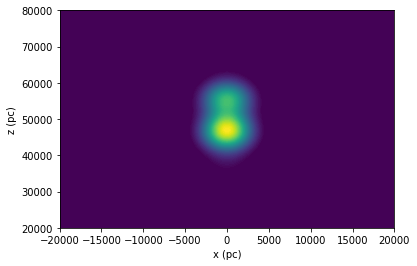

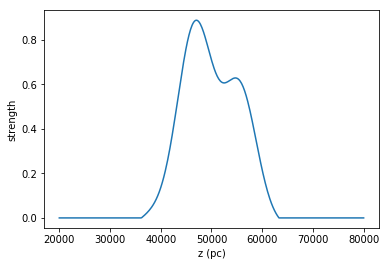

In [187]:
def stellar_distribution(x, y, z):
    """Accepts input in pc only."""
    # Convert into kpc
    x = np.divide(x, 1000)
    y = np.divide(y, 1000)
    z = np.divide(z, 1000)   
    
    # Constants - change me!
    period = 60  # period of cosin oscillations 
    sigma = 2  # sd of Gaussian
    s = [1, 1.5, 0.1]  # array of scale factors
    l = [0, 0, 50]  # array of offsets
    A = 0.6  # strength of cos fn
    B = 1  # offset of cos fn
    myNorm = 0.011  # empirical constant to put the maximum value at 1
    fuckFactor = 0.59  # power on the cosine. absolute madness entails!!1!
    
    # Internal pre-calculated constants for readability - don't change me!
    omega = 2*np.pi / period  # anguluar freq of cosine
    c1 = 1 / ((2 * np.pi)**(3./2.) * sigma**3)  # first constant in Gaussian
    c2 = -1 / (2 * sigma**2)  # second constant in Gaussian
    power = c2 * (s[0]*(x - l[0])**2 + s[1]*(y-l[1])**2 + s[2]*(z-l[2])**2)  # power of Gaussian
    
    # Return the answer
    return np.clip(1/myNorm * (A * np.cos((x**2 + y**2 + z**2)**(fuckFactor)*omega)**2 
                       + B) * c1 * np.exp(power) - 0.08, 0.0, 1.0)

# Make a z-x heatmap
test_points = 400
xrange = np.linspace(-20000, 20000, num=test_points)
yrange = np.linspace(-20000, 20000, num=test_points)
zrange = np.linspace(20000, 80000, num=test_points)

xx, zz = np.meshgrid(xrange, zrange)

krange = stellar_distribution(xx, 0, zz)

plt.contourf(xx, zz, krange, 100)
plt.xlabel("x (pc)")
plt.ylabel("z (pc)")
plt.show()

# Make a z-axis only plot
plt.plot(zrange, stellar_distribution(0, 0, zrange))
plt.xlabel("z (pc)")
plt.ylabel("strength")
plt.show()

Let's also make a re-usable function that can sample stellar_distribution as much as required.

In [188]:
def sample_stellar_distribution(N):
    """Samples stellar_distribution N times and returns stars in ra, dec, r 
    form.
    """
    # Constants - set depending on distribution shape
    xy_min = -5000.0
    xy_max = 5000.0
    z_min = 35000.0
    z_max = 65000.0   
    
    # Internal variables
    ra = np.zeros(N)
    dec = np.zeros(N)
    r = np.zeros(N)
    i = 0
    while i < N:
        # Pick a random x, y, z co-ordinate
        test_x = (xy_max - xy_min)*np.random.rand() + xy_min
        test_y = (xy_max - xy_min)*np.random.rand() + xy_min
        test_z = (z_max - z_min)*np.random.rand() + z_min
        
        # Pick a uniform deviate between 0 and 1
        test_p = np.random.rand()
        
        # Only accept this star if test_p is less than the distribution
        if test_p < stellar_distribution(test_x, test_y, test_z):
            sys.stdout.write("\rDone {}".format(i))
            sys.stdout.flush()
            
            # Convert to ra, dec (note: NOT the same as sph. polars!!)
            r[i] = np.sqrt(test_x**2 + test_y**2 + test_z**2)         
            dec[i] = -np.arccos(test_z / r[i]) + np.pi/2
            ra[i] = np.arctan2(test_y, test_x) + np.pi/2
            
            # Do some checks on right ascension because it's an awkward cookie
            if ra[i] < 0:
                ra[i] += 2* np.pi
            elif ra[i] > 2*np.pi:
                ra[i] -= 2*np.pi
                       
            # Only move on if this all worked
            i += 1
    
    # Return ra, dec, r
    sys.stdout.write("\rAll done!     ")
    sys.stdout.flush()
    return [ra, dec, r]

## Set the numpy random seed
This is important, because this means that everything below will be the same when ran withthe same initial conditions.

In [189]:
np.random.seed(42)

## Setup of the stars to infer dust to

### Sample some fake variable stars from the stellar distribution

Let's sample the real location of the stars

In [190]:
# Set some parameters
N_stars = 100  # Number of stars

# Some names for star samples, currently just consecutive integers
sampled_ids = pd.Series(list(range(0, N_stars)))

# A pandas DataFrame for all true and experimental data
data = pd.DataFrame(sampled_ids, columns=['ID'])

# Sample N_stars stars and save to our DataFrame
data['ra'], data['dec'], data['r_true'] = \
    sample_stellar_distribution(N_stars)
    
# Assign implied parallax values to the data frame
data['omega_true'] = pd.Series((1 / data['r_true'])*1e3)

All done!     

Let's assign stellar parameters from a PLR relation we're gonna make up for funsies.

In [191]:
band_names = ['E', 'M', 'I']
a_true = [-2.9, -2.8, -2.7]
b_true = [ -4.9,  -4.8,  -4.7]
s_true = [ 0.1,  0.3,  0.5]
N_bands = len(band_names)  # number of bands

Use the PL relation to infer values for things like magnitude.

In [192]:
# Calculate PLR parameters
# Periods between 5 to 20 days.
data['P_true'] = pd.Series((20-5)*np.random.rand(N_stars) + 5)

# Cycle over bands and make up absolute magnitudes, extinctions and app. magn.
for i, j in zip(band_names, range(N_bands)):
    band = '_true' + '_' + i
    
    # Calculate absolute magnitude from PLR and add disperion, std.d. of s_true
    data['s'+band] = np.random.normal(loc=0, scale=s_true[j], size=N_stars)
    data['M'+band] = (pd.Series(
                            PLR_magnitude(a_true[j], b_true[j], data['P_true'])
                            + data['s'+band]))
    
    # Extinction is between (j)/nbands + 1.2 and 0.4.
    data['A'+band] = pd.Series((j/N_bands + 1.2 - 0.4)*np.random.rand(N_stars) + 0.4)
    data['m'+band] = (pd.Series(data['M'+band] + 5*np.log10(data['r_true']/10)) 
                      + data['A'+band])

### Model experimental parameters for the fake stars

Now, let's sample some experimental values by messing true values up with random and systematic errors.

In [193]:
def parallax_error_estimator(magnitude, N_stars):
    """Models parallax error according to Gaia collaboration 
    2018 - Summary of contents & survery properties
    - - - - - - - - - - 
     m   sigma_omega [mas]
    <15  0.02-0.04
     17  0.10
     20  0.70
     21  2.00
    """
    # Always 0.02 below 11
    magnitude = np.where(magnitude <= 11, 0.02, 
                         magnitude)
    
    # Make it big for over 21
    magnitude =  np.where(magnitude > 21, 2 * (magnitude-20), 
                          magnitude)
    
    # Linear between 0.7 at 20, 2.0 at 21
    magnitude = np.where(magnitude > 20, 1.3 * (magnitude-20) + 0.70, 
                         magnitude)
    
    # Linear between 0.1 at 17, 0.7 at 20
    magnitude = np.where(magnitude > 17, 0.20 * (magnitude-17) + 0.10, 
                         magnitude)
    
    # Linear between 0.04 at 15, 0.1 at 17
    magnitude = np.where(magnitude > 15, 0.03 * (magnitude-20) + 0.04, 
                         magnitude)
    
    # Linear between 0.02 at 11, 0.04 at 15
    magnitude = np.where(magnitude > 11, 0.005 * (magnitude-20) + 0.02, 
                         magnitude)
    
    # Add a bit of random error & return
    return magnitude * np.random.normal(loc=1, scale=0.2, size=N_stars)


"""Parallax"""
omega_0_true = -0.05  # in mas
parallax_errors = parallax_error_estimator(data['m_true_I'], N_stars) 
data['omega_exp'] = (data['omega_true'] + omega_0_true
                     + np.random.normal(loc=0, scale=1, size=N_stars) 
                     * parallax_errors)
data['omega_sigma'] = np.abs(parallax_errors)


"""Period"""
# Typical 1.5% P error
period_errors = data['P_true'] * np.random.normal(loc=0, scale=0.015, size=N_stars)
data['P_exp'] = data['P_true'] + period_errors
data['P_sigma'] = data['P_exp'] * 0.015


"""Apparent magnitude (uncorrected for extinction) & extinction estimates"""
# Typical errors from Scowcroft 2016 - typical 0.01 mag
# Cycle over all my bands
# Cycle over bands and make up absolute magnitudes, extinctions and app. magn.
for i, j in zip(band_names, range(N_bands)):
    band = '_' + i
    app_magnitude_errors = np.random.normal(loc=0, scale=0.01, size=N_stars)
    data['m_exp'+band] = data['m_true'+band] + app_magnitude_errors
    data['m_sigma'+band] = 0.01
    data['A_exp'+band] = data['A_true'+band] * ((0.9-0.5)*np.random.rand(N_stars) + 0.5)
    data['A_sigma'+band] = 0.3 * data['A_exp'+band]   # 30% error on all


"""Inferred absolute magniture from the test PLR"""
### THIS CURRENTLY JUST USES INPUT ERROR - needs knowledge of relationship error also
# We are assuming that the scatter is much greater than the period error
# to justify M being treated as a Gaussian deviate.
#data['M_exp'] = pd.Series(test_PLR.magnitude(data['P_exp']) + data['s_true'])
#data['M_sigma'] = pd.Series(np.sqrt(
#            (test_PLR.read_band_a() * data['P_sigma']/data['P_exp'] 
#             * np.log(data['P_exp']))**2 
#            + (0 * test_PLR.read_band_b())**2
#            + (0 * dispersion_guess)**2))

# """Inferred radii from the test PLR"""
# data['r_exp'] = np.power(10, (data['m_exp'] 
#                              - data['M_exp']) / 5 + 1)
# data['r_exp_u'] = np.power(10, (data['m_exp'] + data['m_sigma']
#                                - data['M_sigma']) / 5 + 1)
# data['r_exp_l'] = np.power(10, (data['m_exp'] - data['m_sigma']
#                                + data['M_sigma']) / 5 + 1)

# Output some data so far to look at what our results are like
data[['m_true'+band, 'omega_true', 'omega_exp', 'omega_sigma']]

,m_true_I,omega_true,omega_exp,omega_sigma
0,12.735534,0.020834,-0.073273,0.015026
1,11.162043,0.018493,-0.006848,0.023989
2,12.137607,0.021368,-0.002859,0.015067
3,12.646269,0.020824,-0.020215,0.022794
4,12.109443,0.021789,-0.002916,0.016132
5,11.846532,0.023847,0.000692,0.017987
6,12.194860,0.021297,-0.013380,0.015303
7,12.866659,0.019289,-0.011066,0.021302
8,13.353588,0.021843,-0.014128,0.014695
9,11.230578,0.021048,-0.038995,0.019380


## Setup of the prior stars

### Sample some fake stars

In [194]:
# Set some parameters
N_prior = 2000  # Number of stars in the prior

# Some names for star samples, currently just consecutive integers
sampled_ids = pd.Series(list(range(0, N_prior)))

# A pandas DataFrame for all prior data
data_prior = pd.DataFrame(sampled_ids, columns=['ID'])

# Sample N_prior stars and save to our DataFrame
data_prior['ra'], data_prior['dec'], data_prior['r_true'] = \
    sample_stellar_distribution(N_prior)
    
# Make up an error on r and pull the stars from said error
r_errors = (1000 - 500) * np.random.rand(N_prior) + 500
data_prior['r_exp'] = (data_prior['r_true'] 
    + np.random.normal(loc=0, scale=1, size=N_prior) * r_errors)
data_prior['r_sigma'] = r_errors

# Have a peek to make sure this worked
data_prior

All done!     

,ID,ra,dec,r_true,r_exp,r_sigma
0,0,1.332484,1.540451,49882.494750,50700.915639,573.488598
1,1,4.913156,1.536351,45050.815436,45912.085582,905.257034
2,2,1.985730,1.534907,60022.022648,59885.983811,802.378941
3,3,1.747373,1.529049,46415.266415,46395.264527,559.724001
4,4,3.363459,1.527287,46682.745631,45959.352680,958.768920
5,5,0.043193,1.536731,50278.519968,49543.591761,811.313230
6,6,1.972510,1.522704,55655.346642,55214.661796,586.168199
7,7,3.860006,1.537455,45982.882079,45857.713079,612.090911
8,8,4.633852,1.520815,42954.549630,43021.852346,602.069694
9,9,2.397945,1.540385,50980.893294,50809.692912,612.651194


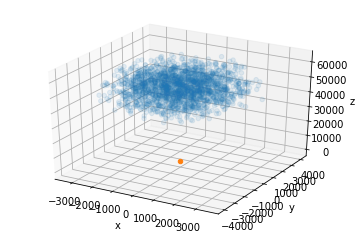

In [195]:
# A plot of the prior
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_prior['r_exp']*np.cos(data_prior['dec'])*np.cos(data_prior['ra']), 
           data_prior['r_exp']*np.cos(data_prior['dec'])*np.sin(data_prior['ra']), 
           data_prior['r_exp']*np.sin(data_prior['dec']), 'bo', alpha=0.1)
ax.scatter([0],[0],[0], 'ro')  # Gaia!

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

### Define a ParallaxPrior class

In [317]:
# Dependencies
import numpy as np
from scipy.optimize import minimize  # Used for minimisation
from scipy.stats import norm  # Fast normal distribution evaluator
from scipy.stats import iqr as interquartile_range
from scipy.signal import savgol_filter  # Smoothing algorithm
from scipy.interpolate import interp1d as interpolate  # Cubic splines
from astropy.stats import knuth_bin_width  # Great bin width estimator


class ParallaxPrior:
    """The following class should be created for each type of prior. It stores 
    information about the stars' prior on parallax, which is dependent on its
    right ascension and declination in 3D space.
    
    The class was coded with a philosophy of having lots of values kept in
    class-wide dictionaries. This means that they can easily be accessed and
    checked.
    
    N.B. All inbound angles must be in radians. 
    """
    
    def __init__(self, ra, dec, r, r_sigma, N_stars, prior_type='finite_cloud'):
        """Initialisation of the class. Makes some local copies of things
        we'll be needing for the duration of our stay.
        """         
        # Keep a local copy of the locations of stars to consider for priors,
        # converted into cartesians to make later maths easier
        self.distribution = np.zeros((ra.size, 3))
        self.distribution_r = np.asarray(r.copy())
        self.distribution_sigma = np.asarray(r_sigma.copy())
        
        # Calc x, y, z
        self.distribution[:, 0] = np.cos(dec) * np.cos(ra)
        self.distribution[:, 1] = np.cos(dec) * np.sin(ra)
        self.distribution[:, 2] = np.sin(dec)
        
        # Initialise class-wide copies of histogram information
        self.bin_widths = {}
        self.bin_numbers = {}
        self.bin_centres = {}
        self.prior_histograms = {}
        self.filtered_histograms = {}
        self.fits = {}
        self.fast_access_fits = np.zeros(1)
        
        # A boolean to record whether the user changed boundary behaviour
        self.set_boundaries_to_zero = True
        
        # Set the type of prior            
        if prior_type=='finite_cloud':
            self.prior_mode = 'finite_cloud'
        else:
            raise TypeError('specified prior_type not supported.')
            
    def make_histograms(self, ID, ra, dec, beam_width, 
                        user_set_boundaries_to_zero=True, boundary_points=5):
        """Uses a Gaussian beam to sample histograms from stellar_distribution 
        and saves the results of these histograms.
        """
        # Record the users' boundary preferences in the class-wide boolean
        self.set_boundaries_to_zero = user_set_boundaries_to_zero
        
        # Firstly, we create an array of beam unit vectors in Cartesians.
        # Later vector maths is much easier in arbitraty Cartesians centred on
        # Gaia, so we make the change now so my head hurts less later :)
        test_stars = np.zeros((ID.size, 3))
        test_stars[:, 0] = np.cos(dec) * np.cos(ra)
        test_stars[:, 1] = np.cos(dec) * np.sin(ra)
        test_stars[:, 2] = np.sin(dec)
        
        # Calculate angles between test stars and the distribution with a fancy
        # formula from: https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python/13849249#13849249
        # This is done with a fast matrix method too because BATDOG is too cool
        # for for loops
        angles_between = np.arccos(np.clip(test_stars @ self.distribution.T, 
                                           -1.0, 1.0))
        
        # Calculate the distance from and along the beam of each star, and use 
        # this to compute a weight value for the star from a Gaussian of 
        # standard deviation beam_width
        distances_from_beam = self.distribution_r * np.sin(angles_between)
        distances_along_beam = self.distribution_r * np.cos(angles_between)
        star_weights = norm(0, beam_width).pdf(distances_from_beam)
        
        # Loop over all the test stars and make some absolutely-sick-stograms.
        # Unfortunately, this has to be done with a for loop, since astropy's 
        # Knuth rule and numpy's histogram methods both only take 1D data. 
        # Also, it's quite naughty to use Knuth's rule on a weighted histogram. 
        # However, I couldn't find a bin rule for weighted histograms, and it 
        # comes up with the best guesses anyway regardless of the weighting.
        i = 0
        for test_star, an_ID in zip(distances_along_beam, ID):
            # Calculate optimal bin widths using Knuth's rule
            self.bin_widths[an_ID] = knuth_bin_width(test_star)

            # Convert said bin width into a number of bins
            self.bin_numbers[an_ID] = int(((test_star.max() - test_star.min()) 
                                       / self.bin_widths[an_ID]))

            # Calculate the resulting prior histogram for this 
            self.prior_histograms[an_ID], bin_edges = np.histogram(
                                                test_star, 
                                                bins=self.bin_numbers[an_ID], 
                                                weights=star_weights[i])
            
            # Set the boundaries of the histogram to zero. This is... 
            # *technically* extrapolation, but... it's also, like, necessary.
            # We do this for boundary_points points opposed to just one,
            # because a well-defined and long boundary behaves better with the
            # filtering methods.
            if self.set_boundaries_to_zero:
                # Boundary_array forces the inserted/appended values to be an
                # array of length boundary_points, giving us our desired number
                # of zero points.
                boundary_array = np.arange(1, boundary_points + 1)
                bin_edges = np.append(
                    np.insert(bin_edges, 0, 
                        bin_edges[0] - boundary_array*self.bin_widths[an_ID]),
                    bin_edges[-1] + boundary_array * self.bin_widths[an_ID])
                
                self.prior_histograms[an_ID] = np.append(
                    np.insert(
                        self.prior_histograms[an_ID], 0, 0.0 * boundary_array), 
                    0.0 * boundary_array)
                self.bin_numbers[an_ID] += boundary_points * 2
            
            # Convert bin edges (meh) into bin centres (yassss!) by finding the
            # mean value between each point with a clever array thing that I'm
            # actually proud of thinking of yay
            self.bin_centres[an_ID] = (bin_edges[1:] + bin_edges[:-1]) / 2
            i += 1
        
    def fit_priors(self, ID, filter_window_size=5, filter_polynomial_order=3,
                  fit_type='slinear'):
        """Fits cubic splines to a filtered version of the histogram data.
        We filter using a Savitzky-Golay filter, which helps to smooth out 
        input data. Then, interpolation is performed by 
        """
        # Apply filters and interpolate a fit
        for an_ID in ID:
            # Calculation of derivatives (the deriv kwarg) at points causes mad 
            # fuckery (it makes things WORSE) so don't do it
            self.filtered_histograms[an_ID] = savgol_filter(
                                                self.prior_histograms[an_ID], 
                                                filter_window_size, 
                                                filter_polynomial_order, 
                                                deriv=0)
            
            # Check that none of the filter results are negative (the Savgol
            # filter knows not of probability being +ve only.) We also make 
            # sure the boundaries are still zero.
            self.filtered_histograms[an_ID][0] = 0.0
            self.filtered_histograms[an_ID][-1] = 0.0
            self.filtered_histograms[an_ID] = np.where(
                                self.filtered_histograms[an_ID] < 0, 
                                0.0, self.filtered_histograms[an_ID])
            
            # Use scipy's cubic interpolation to create a cubic fit function
            # for every star. Note that this fit is done in parallax space
            # (hence the one over), NOT r-space! This makes calls to these
            # functions faster as there aren't any conversions.
            self.fits[an_ID] = interpolate(1 / self.bin_centres[an_ID] * 1e3, 
                                           self.filtered_histograms[an_ID], 
                                           kind=fit_type,
                                           bounds_error=False,
                                           fill_value=0.0)
            
    def plot_priors(self, ID, r_min=30000, r_max=70000, 
                    true_distribution=False, ra=0, dec=0, test_points=100):
        """Plots the histograms for a set of *ID* histograms. Can also be
        plotted against a true distribution by specifying the location of
        the function with true_distribution.
        """
        # Range of r values to plot over
        r_range = np.linspace(r_min, r_max, num=test_points)
        
        # Loop over all the stars
        for an_ID, array_index in zip(ID, range(ID.size)):
            plt.figure(figsize=(8, 6))           
            # The prior histogram values
            plt.plot(self.bin_centres[an_ID], self.prior_histograms[an_ID], 
                     'k--', lw=1, label='Prior')
            
            # The filtered prior
            plt.plot(self.bin_centres[an_ID], self.filtered_histograms[an_ID], 
                     'g--', lw=1, label='Filtered prior')
            
            # The spline fit to the filtered data
            # Get values of the spline. This is done in a for loop call so that
            # any errors arising from invalid input parallaxes can be caught.
            fit_results = np.zeros(test_points)
            for a_point in range(test_points):
                fit_results[a_point] = self.evaluate_a_single_prior(
                                            an_ID, 1 / r_range[a_point] * 1e3)
                
            plt.plot(r_range, fit_results, 'b-', lw=1, ms=0, 
                     label='Spline fit to filtered data')
            
            # Plot the real distribution if requested
            if true_distribution != False:
                # Work out Cartesian unit vectors for each star
                u_x = np.cos(dec[array_index]) * np.cos(ra[array_index])
                u_y = np.cos(dec[array_index]) * np.sin(ra[array_index])
                u_z = np.sin(dec[array_index])
                
                # Work out appropriate x, y, z ranges for the star
                x_range = np.linspace(r_min*u_x, r_max*u_x, num=test_points)
                y_range = np.linspace(r_min*u_y, r_max*u_y, num=test_points)
                z_range = np.linspace(r_min*u_z, r_max*u_z, num=test_points)
                
                # Plot the true distribution on the figure
                dist_to_plot = true_distribution(x_range, y_range, z_range)
                normalisation_factor = (self.prior_histograms[an_ID].max() 
                                        / dist_to_plot.max())
                plt.plot(r_range, dist_to_plot * normalisation_factor, 
                         'r-', lw=1, label='True distribution')
            
            # Final bits of plot formatting
            plt.legend()
            # plt.ylim(0, kDist.max()*1.1)
            plt.xlim(r_min,r_max)
            plt.ylabel('Probability')
            plt.xlabel('Distance (pc)')
            
            plt.title('Parallax prior (in distance space) for star {}'
                      .format(an_ID))
            plt.show()
        
        # Show everything at once at the end
        #plt.show()
    
    def evaluate_a_single_prior(self, an_ID, a_parallax):
        """Evaluates a single prior at a single location for star ID. This 
        method is inherently slower than evaluate_multiple_priors.
        """
        # Work out the fit and return zero if we accidentally hit a -ve fit val
        result = self.fits[an_ID](a_parallax)
        if result < 0.0:
            result = 0.0
        return result
        
    def prep_for_fast_running(self, ID):
        """Must be called before evaluate_multiple_priors. Selects only desired 
        IDs and sets their fit functions up in a fast framework that can be 
        called during emcee running quickly and efficiently.
        """
        # Cast ID as a single-element array if it's a float
        ID = np.asarray(ID)
        
        # Create an empty numpy array that stores object pointers to each fit 
        # function
        self.fast_access_fits = np.empty(ID.size, dtype=object)
        
        # Loop over the dictionary (has to be done with a for loop sadly) and
        # pop required fit functions into fast_access_fits
        for an_ID, i in zip(ID, range(ID.size)):
            self.fast_access_fits[i] = self.fits[an_ID]
            
    def evaluate_multiple_priors(self, test_omegas):
        """Fast evaluation of fit functions at all successful points. Must be
        called with input parallaxes of the correct shape. Note that checking 
        for negative probabilities implied by fits *is not performed by this 
        function*, and should instead be done on returned data.
        """
        # Use numpy vectorize to make a callable fector that takes a function
        # object and a function argument as inputs, and returns the result of 
        # the function call.
        function_vector = np.vectorize(lambda f, x: f(x))
        return function_vector(self.fast_access_fits, test_omegas)

### Initialise the ParallaxPrior class

In [318]:
parallax_prior_repo = ParallaxPrior(data_prior['ra'], data_prior['dec'], 
                               data_prior['r_exp'], data_prior['r_sigma'], 5)

In [319]:
parallax_prior_repo.make_histograms(data['ID'], data['ra'], data['dec'], 
                               1500, boundary_points=10)

In [320]:
parallax_prior_repo.fit_priors(data['ID'], filter_window_size=5, 
                          filter_polynomial_order=3, fit_type='cubic')

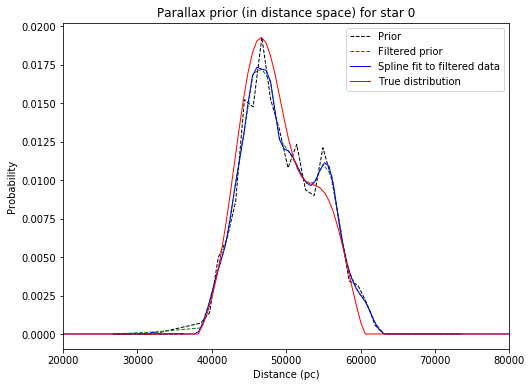

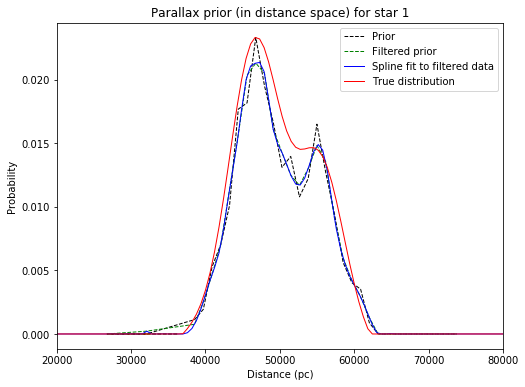

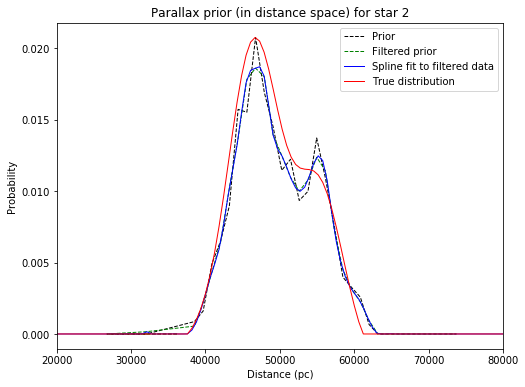

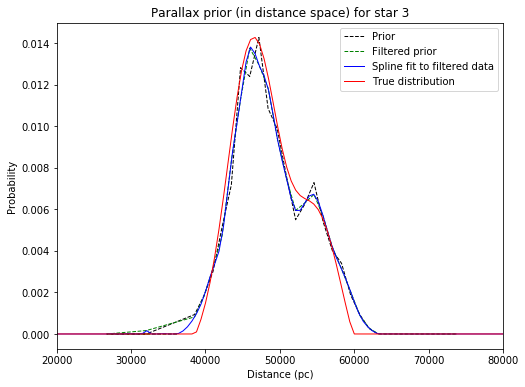

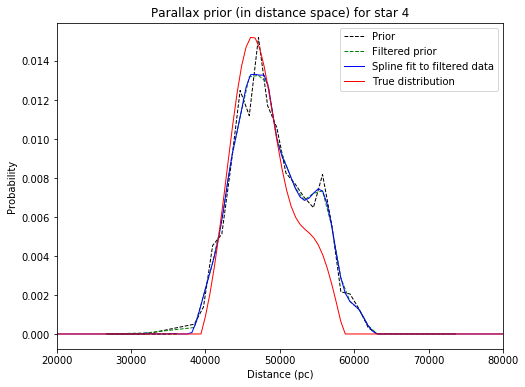

In [321]:
test_IDs = np.arange(0, 5, dtype=np.int64)
parallax_prior_repo.plot_priors(test_IDs, 
                                true_distribution=stellar_distribution, 
                                ra=data['ra'], dec=data['dec'], 
                                test_points=100,
                                r_min=20000, r_max=80000)

In [322]:
parallax_prior_repo.prep_for_fast_running(data['ID'])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


## Setup of omega_0 constraining binary stars

In addition, we'll use some binary stars to constrain omega_0.

In [202]:
# Name the binaries and again create a data frame
N_binaries = 0  # number of parallax-constraining binary stars
sampled_ids = pd.Series(np.arange(0, N_binaries))
binaries = pd.DataFrame(sampled_ids, columns=['ID'])

# Assign a random ra and dec to every star
binaries['ra'] = pd.Series(np.random.rand(N_binaries) * 360)
binaries['dec'] = pd.Series((np.random.rand(N_binaries) - 0.5)*180)

# Repeat above and pull out some star locations from stellar_distribution
i = 0
r_true = np.zeros(N_binaries)
while i < N_binaries:
    # Create a test r of size 13 times that of the scale and a deviate test_p 
    # to compare with the interval
    test_r = (2*scale - scale/2)*np.random.rand() + scale/2
    test_p = np.random.rand()
    
    # See if the test point is in the distribution or not
    if test_p < stellar_distribution(test_r, scale, fact=factor):
        r_true[i] = test_r
        i += 1

# Assign r and implied parallax values we've got to the data frame
binaries['r_true'] = pd.Series(r_true)
binaries['omega_true'] = pd.Series((1 / r_true)*1e3)

# Assign an experimental parallax and error
parallax_errors = parallax_error_estimator(13, N_binaries)
binaries['gaia_exp'] = (binaries['omega_true'] + omega_0_true
                     + np.random.normal(loc=0, scale=1, size=N_binaries) 
                     * parallax_errors)
binaries['gaia_sigma'] = np.abs(parallax_errors)

# Same again, but for very precise external parallaxes
parallax_errors = np.random.normal(loc=0, scale=0.0001, size=N_binaries)
binaries['ext_exp'] = (binaries['omega_true'] * (1 + parallax_errors))
binaries['ext_sigma'] = np.sqrt(np.abs(parallax_errors)**2 
                                + 0.0001*binaries['ext_exp']**2)

# Output data for a peek
binaries

,ID,ra,dec,r_true,omega_true,gaia_exp,gaia_sigma,ext_exp,ext_sigma


# Setup of likelihood & priors
------

**N.B. everything here returns the result of a log.**

## A debug helper function
This function is a convenience to make debug error reporting in the following functions easier.

In [203]:
def debug_output(answer, fname, extra=""):
    """Checks an input array for non-finite values, and outputs the array,
    the name of the function and additional information if there are any.
    """
    # Check for infs and say where they are if so
    if np.all(np.isfinite(answer)) == False:
        print(fname + " encountered infs in these return array values:")
        print(np.where(np.isfinite(answer) == False)[0])
        
        # Print any extra information from the caller
        if len(extra) > 0:
            print("  " + extra)

## Priors
### Prior on extinction
This is simply a uniform prior to constrain the extinction co-efficient to something reasonable.

In [204]:
def prior_extinction(params, r, debug):
    """Currently, a uniform prior between a reasonable range for an 
    extinction co-efficient."""
    # Constants
    max_extinction = 5.0
    min_extinction = 0.0
    
    # Set any incorrect range extinctions to -np.inf (log of 0) and return A
    answer = np.where(np.logical_or(params[r['A']] < min_extinction, 
                                    params[r['A']] > max_extinction), 
                      -np.inf, 0)
    
    if debug:
        debug_output(answer, "prior_extinction")
    
    return answer

### Prior on PLR parameters
Basic uniform priors for a, b and a Jeffreys log-uniform prior on the scatter.

In [364]:
def prior_PLR(params, r, debug):
    """Uniform prior in reasonable ranges for a, b, and a Jeffreys log-uniform 
    prior for scatter.
    """
    # Constants
    max_a = 0.0
    min_a = -5.0
    max_b = 15.0
    min_b = -15.0
    
    # Tests
    a_prior = np.where(np.logical_or(params[r['a']] < min_a, 
                                    params[r['a']] > max_a), 
                      -np.inf, 0)
    b_prior = np.where(np.logical_or(params[r['b']] < min_b, 
                                    params[r['b']] > max_b), 
                      -np.inf, 0)
    
    # VERY CHEEKY TEST CONSTRAINT. THIS LINE OF CODE IS VERY CHEEKY
    #params[r['s']] = np.where(params[r['s']] > 0.1, -np.inf, params[r['s']]) 
    
    # Jeffreys first tests that scatter is +ve, then sets to -log of the scattr
    s_prior = np.where(params[r['s']] > 0, -np.log(params[r['s']]), -np.inf) 
    
    if debug:
        debug_output(a_prior, "prior_PLR:a_prior", 
            extra="prior_PLR calculates N_bands values for a")
        
        debug_output(b_prior, "prior_PLR:b_prior", 
            extra="prior_PLR calculates N_bands values for b")
        
        debug_output(s_prior, "prior_PLR:s_prior", 
            extra="prior_PLR calculates N_bands values for s")

    return a_prior + b_prior + s_prior

### Parallax priors

#### Prior on variable star parallax
*Parallax is extremely dangerous. We must deal with it!* The following computes the parallax prior, which is effectively our distance prior but flipped around a bit.

In [225]:
def prior_parallax_variables(params, r, ppr, debug):
    """The distance prior but in terms of parallax. We check for any cheeky 
    parallaxes less than zero and set them to -np.inf; if not, set to 
    distance prior.
    """
    # Apply distance prior to main stars
    class_evaluation = ppr.evaluate_multiple_priors(params[r['omega']])
    
    answer = np.where(class_evaluation < 0, -np.inf, np.log(class_evaluation))
    
    if debug:
        debug_output(answer, "prior_parallax_variables")
    
    return answer

#### Prior on binary star parallax
Intentionally a separate function to the star parallaxes due to later use needs and the fact that the binary stars may not always be distributed in the same way as the variable stars.

In [207]:
def prior_parallax_binaries(params, r, debug):
    """The distance prior but in terms of parallax. We check for any cheeky 
    parallaxes less than zero and set them to -np.inf; if not, set to 
    distance prior.
    """
    # Apply distance prior to binary stars
    answer = np.where(params[r['omega_B']] < 0, -np.inf, 
                      np.log(1/(2 * params[r['L']]**3 * params[r['omega_B']]**2)) 
                      - 1 / (params[r['omega_B']] * params[r['L']]))
    
    if debug:
        debug_output(answer, "prior_parallax_binaries")
    
    return answer

#### Prior on parallax offset
A uniform prior to constrain $\omega_0$ to a reasonable value.

In [208]:
def prior_parallax_offset(params, r, debug):
    """A uniform prior in a defined reasonable range for omega_0."""
    # Constants (in mas)
    max_omega_0 = 0.2
    min_omega_0 = -0.2
    
    # Check if we're in the correct range
    if (params[r['omega_0']] <= max_omega_0 
        and params[r['omega_0']] >= min_omega_0):
        answer = 0
    else:
        answer = -np.inf      
        
    if debug:
        debug_output(answer, "prior_parallax_offset")
    
    return answer

### Prior on scale length
A uniform prior within sensible values.

In [226]:
def prior_scale(params, r, debug):
    """A uniform prior defined in a reasonable range for L."""
    # Constants
    max_scale = 60000
    min_scale = 40000
    
    # Check if we're in the correct range
    if (params[r['L']] <= max_scale 
        and params[r['L']] >= min_scale):
        answer = 0
    else:
        answer = -np.inf
    
    if debug:
        debug_output(answer, "prior_scale")
    
    return answer

### Logarithmic priors combination

In [227]:
def prior_total(params, r, ppr, debug):
    """Sums all of the priors. Convenience function!"""
    return (np.sum(prior_extinction(params, r, debug))
            + np.sum(prior_PLR(params, r, debug))
            + np.sum(prior_parallax_variables(params, r, ppr, debug))
            # + np.sum(prior_parallax_binaries(params, r, debug))
            + prior_parallax_offset(params, r, debug)
            + prior_scale(params, r, debug))
    

## Likelihood function
Parts of the likelihood fn are defined here.

### Parallax likelihoods

#### For variable stars

In [211]:
def likelihood_parallax_variables(params, r, data, debug):
    """Returns a normal distribution evaluated at the measured Gaia parallax 
    value, with:
    
    mean = the inferred parallax value plus the Gaia zero-point offset
    standard deviation = the error on the Gaia parallax value
    """
    # Pull parallax likelihood from our normal distribution
    answer = np.log(norm(params[r['omega']] + params[r['omega_0']], 
                         data['omega_sigma']).pdf(data['omega_exp']))
    
    if debug:
        debug_output(answer, "likelihood_parallax_variables")
    
    return answer

#### For binary stars - Gaia measurements

In [212]:
def likelihood_parallax_binaries_gaia(params, r, data, debug):
    """Returns a normal distribution evaluated at the measured Gaia parallax 
    value, with:
    
    mean = the inferred parallax value plus the Gaia zero-point offset
    standard deviation = the error on the Gaia parallax value
    """
    # Pull parallax likelihood from our normal distribution
    answer = np.log(norm(params[r['omega_B']] + params[r['omega_0']], 
                         data['gaia_sigma']).pdf(data['gaia_exp']))
    
    if debug:
        debug_output(answer, "likelihood_parallax_binaries_gaia")
    
    return answer

#### For binary stars - external measurements

In [213]:
def likelihood_parallax_binaries_ext(params, r, data, debug):
    """Returns a normal distribution evaluated at the measured external 
    parallax value, with:
    
    mean = the inferred parallax value
    standard deviation = the error on the parallax value
    """
    # Pull parallax likelihood from our normal distribution
    answer = np.log(norm(params[r['omega_B']], 
                         data['ext_sigma']).pdf(data['ext_exp']))
    
    if debug:
        debug_output(answer, "likelihood_parallax_binaries_ext")
    
    return answer

### Likelihood of period data

In [214]:
def likelihood_period(params, r, data, debug):
    """Returns the likelihood of the inferrred intrinsic period parameters,
    pulled from a normal distribution with:
    mean = P_intrinsic
    standard deviation = error on the measured period
    """
    # Pull likelihood from normal distribution
    answer = np.log(norm(params[r['P']], data['P_sigma']).pdf(data['P_exp']))
    
    if debug:
        debug_output(answer, "likelihood_period")
    
    return answer

### Likelihood of apparent magnitude data

In [215]:
def likelihood_app_mag(params, r, data, debug):
    """Evaluates the Leavitt law to evaluate the likelihood of the inferred
    apparent magnitude data.
    
    Typically, this function is a common cause of issues, and also has a lot of 
    evaluations to perform. It is optimised by using element-wise numpy array
    evaluations of a number of parameters.
    """    
    # Mean is at the Leavitt law implied apparent magnitudea
    # N.B. parameters are reshaped into numpy arrays, where the horizontal axis 
    # (0) is the star number, and the vertical axis (1) is the band
    mean = (params[r['a']].reshape(data['N_bands'], 1)
            * np.log10(params[r['P']])
            + params[r['b']].reshape(data['N_bands'], 1)
            + params[r['A']].reshape(data['N_bands'], data['N_stars']) 
            - 5*np.log10(params[r['omega']])
            + 10)
    
    # Standard deviation is at the scatter plus the error on magnitude
    # measurements, added in quadrature
    standard_deviation = np.sqrt(params[r['s']].reshape(data['N_bands'], 1)**2 
                                 + data['m_sigma']**2)
    
    # We evaluate a normal distribution of the above values at the measured
    # apparent magnitude value
    distribution = norm(mean, standard_deviation).pdf(data['m_exp'])
    
    # We only take logs when the distribution isn't gonna make it be infinity.
    # This catches a... very... common warning message (thank me later)
    answer = np.where(distribution > 1e-320, np.log(distribution), -np.inf)
       
    if debug:
        debug_output(answer, "likelihood_app_mag")

    return answer

### Probability of the nuisance magnitude parameters

In [216]:
def likelihood_nuisance(params, r, debug):
    """Currently just a test that the apparent magnitudes and periods are 
    within reasonable ranges.
    """
    # Constants
    max_P = 40
    min_P = 1
    
    # Test apparent and absolute magnitudes
    test_P = np.logical_or(params[r['P']] > max_P, params[r['P']] < min_P)
    answer = np.where(test_P, -np.inf, 0)
    
    if debug:
        debug_output(answer, "likelihood_nuisance")
    
    return answer

### Logarithmic likelihoods combination

In [217]:
def likelihood_total(params, ranges, data, debug):
    """Sums all of the likelihood functions. Convenience function!"""
    return (np.sum(likelihood_parallax_variables(params, ranges, 
                                                   data, debug))
            # + np.sum(likelihood_parallax_binaries_gaia(params, ranges, 
            #                                           data, debug))
            # + np.sum(likelihood_parallax_binaries_ext(params, ranges, 
            #                                          data, debug))
            + np.sum(likelihood_period(params, ranges, data, debug))
            + np.sum(likelihood_app_mag(params, ranges, data, debug))
            + np.sum(likelihood_nuisance(params, ranges, debug)))

## Posterior
The last prep step! This function defines our log posterior.

In [262]:
def posterior(params, ranges, data, ppr, debug=False):
    """Sums all of the logarithmic likelihoods and priors."""
    return (likelihood_total(params, ranges, data, debug) 
            + prior_total(params, ranges, ppr, debug))

# Creation of a starting guess
------

For any decent number of stars, the model has a huge number of dimensions. To improve the convergence time of the model, we can use function minimisation methods for each individual star and some intuition with hyperparameters to have a guess that's at a good initial probability.

## Define a function that sets up a *ranges* dictionary

In [365]:
def create_new_ranges_dict(N_stars, N_binaries, N_bands):
    """Because emcee needs to take a 1D position vector as its parameters 
    argument, it's necessary to keep a dictionary that 
    tells us what each parameter is.
    
    This function is lovely and helpful and makes it for you. How kind!
    """
    ranges = {}
    ranges['omega_0'] = 0
    ranges['L'] = 1    
    ranges['a'] = ranges['L'] + 1 + np.arange(N_bands)
    ranges['b'] = ranges['a'][-1] + 1 + np.arange(N_bands)
    ranges['s'] = ranges['b'][-1] + 1 + np.arange(N_bands)
    if N_binaries > 0:
        ranges['omega_B'] = ranges['s'][-1] + 1 + np.arange(N_binaries)
        ranges['omega'] = ranges['omega_B'][-1] + 1 + np.arange(N_stars)
    else:
        ranges['omega'] = ranges['s'][-1] + 1 + np.arange(N_stars)
    ranges['P'] = ranges['omega'][-1] + 1 + np.arange(N_stars)
    ranges['A'] = ranges['P'][-1] + 1 + np.arange(N_stars*N_bands)
    
    return ranges

## Make a dictionary of data
Infuriatingly, pandas doesn't really have support for 2D or more numpy arrays, and in conjunction with emcee's total lack of support for anything other than numpy arrays, it's necessary to put all the info in data into a dictionary of arrays.

However, this little wall of code does make emcee running a lot quicker later, as we can do everything with fancier elementwise numpy evaluations that require significantly fewer lookups of array values.

In [366]:
data_emcee = {}

# Make some blank arrays to pop stuff on later
data_emcee['ID'] = np.asarray(data['ID'])
data_emcee['ra'] = np.asarray(data['ra'])
data_emcee['dec'] = np.asarray(data['dec'])
data_emcee['m_exp'] = np.zeros((N_bands, N_stars))
data_emcee['m_sigma'] = np.zeros((N_bands, N_stars))
data_emcee['P_exp'] = np.asarray(data['P_exp'])
data_emcee['P_sigma'] = np.asarray(data['P_sigma'])
data_emcee['omega_exp'] = np.asarray(data['omega_exp'])
data_emcee['omega_sigma'] = np.asarray(data['omega_sigma'])
data_emcee['N_stars'] = N_stars
data_emcee['N_bands'] = N_bands
data_emcee['N_binaries'] = N_binaries
data_emcee['ext_exp'] = np.asarray(binaries['ext_exp'])
data_emcee['ext_sigma'] = np.asarray(binaries['ext_sigma'])
data_emcee['gaia_exp'] = np.asarray(binaries['gaia_exp'])
data_emcee['gaia_sigma'] = np.asarray(binaries['gaia_sigma'])

# Cycle over the bands and pop magnitude data in, making 'm_exp' into an array 
# of shape N_bands x N_good
for a_band, band_number in zip(band_names, range(N_bands)):
    data_emcee['m_exp'][band_number] = data['m_exp_' + a_band].copy()
    data_emcee['m_sigma'][band_number] = data['m_sigma_' + a_band].copy()

## Set initial expected hyperparameter guesses

In [367]:
guess_omega_0 = -0.05
guess_L = 50000
guess_a = [-2.9, -2.8, -2.7]
guess_b = [ -4.9,  -4.8,  -4.7]
guess_s = [ 0.1,  0.3,  0.5]

## Create a starting guess parameters vector

In [368]:
ranges = create_new_ranges_dict(N_stars, N_binaries, N_bands)

# Make up our starting guess as a long numpy array. This takes some faff and
# appending to get right.
starting_guess = np.array([guess_L])
starting_guess = np.append(starting_guess, guess_a)
starting_guess = np.append(starting_guess, guess_b)
starting_guess = np.append(starting_guess, guess_s)

"""
starting_guess = np.append(starting_guess, data_emcee['omega_exp'])
starting_guess = np.append(starting_guess, data_emcee['P_exp'])
starting_guess = np.append(starting_guess, np.zeros(N_bands * N_stars))
"""

"\nstarting_guess = np.append(starting_guess, data_emcee['omega_exp'])\nstarting_guess = np.append(starting_guess, data_emcee['P_exp'])\nstarting_guess = np.append(starting_guess, np.zeros(N_bands * N_stars))\n"

## Maximise said starting guess in a rigorous process
To dramatically improve emcee's chances, the following cells attempt to make our starting guess as likely as possible before we even begin. Expect to spend some time fiddling to get the best guess for any input data.

It works by first inferring the most likely parallaxes, and then using these to infer extinctions. Doing it in this order has been experimentally shown to stop likelihood_app_mag from being downright rude.

### Find omega_0 from assumed-correct omega_B values

Firstly, let's maximise the prior probability of omega_B external values.

In [369]:
if N_binaries > 0:
    # Take a simple mean value of the difference between Gaia and external 
    # binary star parallax measurements.
    omega_binaries = data_emcee['ext_exp']
    guess_omega_0 = np.mean(data_emcee['gaia_exp'] - omega_binaries)
    print("Guessing guess_omega_0 at {}".format(guess_omega_0))

else:
    omega_binaries = np.array([])
    print("Using user value for guess_omega_0 from above due to 0 binaries.")

# Store omega_0 at the front and the omega_Bs at the end of starting_guess
starting_guess = np.insert(starting_guess, 0, guess_omega_0)
starting_guess = np.append(starting_guess, omega_binaries)
hacked_guess = starting_guess.copy()  # A special guess for omega solving later

Using user value for guess_omega_0 from above due to 0 binaries.


### Parallax maximisation

First, let's estimate parallax in three ways: with the Gaia values, with the PLR and with the distance prior parameter. We'll compare their individual likelihoods and only use the best one.

In [370]:
# Find the band with the estimated least scatter
best_band_arg = np.argmin(guess_s)
best_band = band_names[best_band_arg]

# The Gaia parallaxes
omega_gaia = data_emcee['omega_exp'] - guess_omega_0
params_gaia = np.append(hacked_guess, omega_gaia)
likelihood_gaia = (prior_parallax_variables(params_gaia, ranges, 
                                            parallax_prior_repo, False)
                    + likelihood_parallax_variables(params_gaia, ranges, 
                                                    data_emcee, False))
# The PLR parallaxes
omega_PLR = np.power(10, (guess_a[best_band_arg] *np.log10(data_emcee['P_exp'])
                          + guess_b[best_band_arg]
                          + data['A_exp_' + best_band]
                          + 10 - data['m_exp_' + best_band]) / 5)
params_PLR = np.append(hacked_guess, omega_PLR)
likelihood_PLR = (prior_parallax_variables(params_PLR, ranges, 
                                           parallax_prior_repo, False)
                    + likelihood_parallax_variables(params_PLR, ranges, 
                                                    data_emcee, False))
# The prior parallaxes
omega_prior = np.repeat(1/guess_L * 1e3, N_stars)
params_prior = np.append(hacked_guess, omega_prior)
likelihood_prior = (prior_parallax_variables(params_prior, ranges, 
                                             parallax_prior_repo, False)
                    + likelihood_parallax_variables(params_prior, ranges, 
                                                    data_emcee, False))

# Find where Gaia is the best
best_gaia = np.where(np.logical_and(
                         np.logical_and(
                             np.isfinite(likelihood_gaia),
                             likelihood_gaia > likelihood_PLR),
                         likelihood_gaia > likelihood_prior))[0]

# Find where the PLR is the best
best_PLR = np.where(np.logical_and(
                         np.logical_and(
                             np.isfinite(likelihood_PLR),
                             likelihood_PLR > likelihood_gaia),
                         likelihood_PLR > likelihood_prior))[0]

# Find where the prior is the best
best_prior = np.where(np.logical_and(
                         np.logical_and(
                             np.isfinite(likelihood_prior),
                             likelihood_prior > likelihood_PLR),
                         likelihood_prior > likelihood_gaia))[0]

# Pop all the best guesses in a single array
omega_best = np.append(np.append(omega_gaia[best_gaia], 
                                 omega_PLR[best_PLR]), 
                                 omega_prior[best_prior])

# Keep a list of stars that worked, and sort it so it's in ascending order
omega_success_guessed = np.append(np.append(best_gaia, best_PLR), best_prior)
omega_success_guessed = np.sort(omega_success_guessed)

# Tell the user about how it all went =)
print("Guessing done. Where each different method was the best estimator:")
print("  gaia:  {}".format(len(best_gaia)))
print("  PLR:   {}".format(len(best_PLR)))
print("  prior: {}".format(len(best_prior)))
print("We failed to make a guess on {} stars."
      .format(N_stars - len(omega_success_guessed)))

Guessing done. Where each different method was the best estimator:
  gaia:  3
  PLR:   30
  prior: 67
We failed to make a guess on 0 stars.


/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log
/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log


Next, let's use scipy to hone in on the best values for our parallaxes:

In [371]:
def function_to_minimise(omega, an_ID, starting_guess, ranges, data):
    """This function is mostly just to make interfacing between scipy and
    my functons possible. Note that we multiply by -1 because scipy's
    algorithms minimise, not maximise.
    """
    # Pop the singular parallax on the end of a position vector
    params = np.append(starting_guess, omega)
    
    return -1 * (np.sum(parallax_prior_repo.evaluate_a_single_prior(an_ID, 
                                                                   omega))
                 + likelihood_parallax_variables(params, ranges, data, False))

# Keep a list of all the parallaxes that get through this step
omega_success_maximised = np.array([]).astype('int64')
omega_fails_maximised = np.array([]).astype('int64')

# Keep a list of the actual parallaxes themselves that have worked
omega_maximised = np.array([])

# Make hacked ranges and data dictionaries that ensures later methods only
# look for one star
hacked_ranges = ranges.copy()
hacked_ranges['omega'] = hacked_ranges['omega'][0]
hacked_ranges['P'] = hacked_ranges['omega'] + 1
hacked_ranges['A'] = hacked_ranges['P'] + 1 + np.arange(N_bands)

hacked_data = data_emcee.copy()
hacked_data['N_stars'] = 1

# Cycle over our stars
for a_star in omega_success_guessed:
    print("Trying to maximise star {}...".format(a_star))
    
    # Get the ID of this star
    an_ID = data_emcee['ID'][a_star]
    
    # We cheat a bit here and make a fake data dict for interfacing purposes
    hacked_data['omega_exp'] = data_emcee['omega_exp'][a_star]
    hacked_data['omega_sigma'] = data_emcee['omega_sigma'][a_star]

    # Do the scipy bit and get an OptimizeResult type object back
    result = minimize(function_to_minimise, omega_best[a_star], 
                          args=(an_ID, hacked_guess, 
                                hacked_ranges, hacked_data), 
                          method='Nelder-Mead',
                          options={'maxiter':2000, 'disp':True})
        
    if result.success:
        print("  Successfully maximised for star {}\n".format(a_star))
        # Keep a record of star numbers that worked
        omega_success_maximised = np.append(omega_success_maximised, a_star)
        omega_maximised = np.append(omega_maximised, result.x)
        
    else:
        print("~~FAILED to maximise star {}\n".format(a_star))
        omega_fails_maximised = np.append(omega_fails_maximised, a_star)
       
print("Successful maximisations: {}".format(len(omega_success_maximised)))
print("Failed maximisations: {}".format(len(omega_fails_maximised)))

Trying to maximise star 0...
Optimization terminated successfully.
         Current function value: -3.279037
         Iterations: 14
         Function evaluations: 28
  Successfully maximised for star 0

Trying to maximise star 1...
Optimization terminated successfully.
         Current function value: -2.811215
         Iterations: 11
         Function evaluations: 22
  Successfully maximised for star 1

Trying to maximise star 2...
Optimization terminated successfully.
         Current function value: -3.276307
         Iterations: 12
         Function evaluations: 24
  Successfully maximised for star 2

Trying to maximise star 3...
Optimization terminated successfully.
         Current function value: -2.862311
         Iterations: 10
         Function evaluations: 20
  Successfully maximised for star 3

Trying to maximise star 4...
Optimization terminated successfully.
         Current function value: -3.207998
         Iterations: 12
         Function evaluations: 24
  Successful

Trying to maximise star 54...
Optimization terminated successfully.
         Current function value: -3.271246
         Iterations: 10
         Function evaluations: 20
  Successfully maximised for star 54

Trying to maximise star 55...
Optimization terminated successfully.
         Current function value: -2.756450
         Iterations: 12
         Function evaluations: 24
  Successfully maximised for star 55

Trying to maximise star 56...
Optimization terminated successfully.
         Current function value: -2.921809
         Iterations: 9
         Function evaluations: 18
  Successfully maximised for star 56

Trying to maximise star 57...
Optimization terminated successfully.
         Current function value: -3.100177
         Iterations: 13
         Function evaluations: 26
  Successfully maximised for star 57

Trying to maximise star 58...
Optimization terminated successfully.
         Current function value: -2.811253
         Iterations: 13
         Function evaluations: 26
  Su

### Inference of extinctions from parallax guesses
Lastly, we're going to infer extinction values from the parallax guesses, and check that these values aren't crap by evaluating posterior() for these guesses.

In [372]:
# Make some long 1D arrays to keep the good shit in for the time being
good_omegas = np.array([])
good_periods = np.array([])
good_extinctions = np.array([])

# Keep a record of stars that get past THE FINAL CHALLENGE
good_stars = np.array([])
bad_stars = np.array([])

# Add extra values to hacked_guess so that we can write a test parallax, period
# and extinctions here
hacked_guess = np.append(hacked_guess, np.zeros(2 + N_bands))

# Cycle over our good parallax guesses to make good extinction guesses,
# and add these to starting_guess
for a_star, an_omega in zip(omega_success_maximised, omega_maximised):
    print("Trying to find extinction for star {}...".format(a_star))
    
    # Evaluate the Leavitt Law for extinction
    extinction_guess = (data_emcee['m_exp'][:, a_star] 
                           - starting_guess[ranges['a']]
                           * np.log10(data_emcee['P_exp'][a_star])
                           - starting_guess[ranges['b']]
                           + 5 * np.log10(an_omega) - 10)
    
    # Set any -ve guesses to 0
    extinction_guess = np.where(extinction_guess < 0.0, 0.0, extinction_guess)
    
    # Make a hacked_data containing only star data on DIS STAR
    hacked_data['omega_exp'] = data_emcee['omega_exp'][a_star]
    hacked_data['omega_sigma'] = data_emcee['omega_sigma'][a_star]
    hacked_data['P_exp'] = data_emcee['P_exp'][a_star]
    hacked_data['P_sigma'] = data_emcee['P_sigma'][a_star]
    hacked_data['m_exp'] = data_emcee['m_exp'][:, a_star]
    hacked_data['m_sigma'] = data_emcee['m_sigma'][:, a_star]
    
    # Also hack the guess to only contain data on DIS STAR
    hacked_guess[hacked_ranges['omega']] = an_omega
    hacked_guess[hacked_ranges['P']] = data_emcee['P_exp'][a_star]
    hacked_guess[hacked_ranges['A']] = extinction_guess
    
    # Set the parallax prior repo to only contain one star
    parallax_prior_repo.prep_for_fast_running([data_emcee['ID'][a_star]])
    
    print("  guessed extinctions as: {}".format(extinction_guess))
    
    # Evaluate the posterior for this extinction alone
    how_shit_is_this_guess = posterior(hacked_guess, hacked_ranges, 
                                       hacked_data, 
                                       parallax_prior_repo, debug=True)
    
    # Tell the user if batdog can't bork rn
    if np.isfinite(how_shit_is_this_guess):
        print("  Success! posterior() is finite, with a value {}"
              .format(how_shit_is_this_guess))
        print("  star {} will appear in the starting guess. Yay :3\n".format(a_star))
        
        # Jot down all the details of this spiffingly successful star
        good_omegas = np.append(good_omegas, an_omega)
        good_periods = np.append(good_periods, data_emcee['P_exp'][a_star])
        good_extinctions = np.append(good_extinctions, extinction_guess)
        good_stars = np.append(good_stars, a_star)
        
    else:
        print("  FAILURE! posterior() has a value of {}"
              .format(how_shit_is_this_guess))
        print("~~star {} will not appear in the starting guess.\n".format(a_star))
        
        # There are only good stars, and bad stars. ABSOLUTELY NO IN-BETWEEN
        bad_stars = np.append(bad_stars, a_star)

        
# Add all the good shit to a final guess
starting_guess = np.append(starting_guess, good_omegas)
starting_guess = np.append(starting_guess, good_periods)

# (we do something special for extinctions, and reformat the array from being: 
# [star1:band1, star1:band2, star2:band1, star2:band2 ...etc]
# to instead being in band order, like:
# [star1:band1, star2:band1, star1:band2, star2:band2 ...etc]
starting_guess = np.append(starting_guess, 
    good_extinctions.reshape(len(good_stars), N_bands).T.flatten())
    
# Work out which original stars aren't in the final set
stars_to_remove = np.where(np.isin(np.arange(N_stars), 
                      good_stars) == False)[0]

# Remove the bad ones from data_emcee
keys = list(data_emcee.keys())
keys.remove('m_exp')
keys.remove('m_sigma')
keys.remove('N_stars')
keys.remove('N_bands')
keys.remove('N_binaries')
for a_key in keys:
    data_emcee[a_key] = np.delete(data_emcee[a_key], stars_to_remove)

# We handle magnitudes separately as these are 2D arrays of N_bands x N_stars
data_emcee['m_exp'] = np.delete(data_emcee['m_exp'], stars_to_remove, axis=1)
data_emcee['m_sigma'] = np.delete(data_emcee['m_sigma'], stars_to_remove, 
                                  axis=1)

# Set N to a new value based on how many guesses we have
N_good = len(good_stars)
data_emcee['N_stars'] = N_good

# Make a fresh ranges dictionary based on how many good stars there are
ranges = create_new_ranges_dict(N_good, N_binaries, N_bands)

print("All done! There were {} good stars and {} bad ones."
      .format(N_good, N_stars-N_good))

Trying to find extinction for star 0...
[0]
  guessed extinctions as: [nan nan nan]
likelihood_app_mag encountered infs in these return array values:
[0 0 0 1 1 1 2 2 2]
prior_parallax_variables encountered infs in these return array values:
[0]
  FAILURE! posterior() has a value of -inf
~~star 0 will not appear in the starting guess.

Trying to find extinction for star 1...
[1]
  guessed extinctions as: [2.17276605 3.65349939 2.22517388]
prior_parallax_variables encountered infs in these return array values:
[0]
  FAILURE! posterior() has a value of -inf
~~star 1 will not appear in the starting guess.

Trying to find extinction for star 2...
[2]
  guessed extinctions as: [2.19859183 2.36429591 3.17664698]
prior_parallax_variables encountered infs in these return array values:
[0]
  FAILURE! posterior() has a value of -inf
~~star 2 will not appear in the starting guess.

Trying to find extinction for star 3...
[3]
  guessed extinctions as: [1.46786045 1.0339209  2.13947398]
prior_paral

/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in log10
/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in less
/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in log10
/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in greater
/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykerne


[62]
  guessed extinctions as: [2.36958577 2.58004522 3.07066256]
prior_parallax_variables encountered infs in these return array values:
[0]
  FAILURE! posterior() has a value of -inf
~~star 62 will not appear in the starting guess.

Trying to find extinction for star 63...
[63]
  guessed extinctions as: [2.27286427 2.29241835 3.17877363]
prior_parallax_variables encountered infs in these return array values:
[0]
  FAILURE! posterior() has a value of -inf
~~star 63 will not appear in the starting guess.

Trying to find extinction for star 64...
[64]
  guessed extinctions as: [2.67015792 2.32735715 3.4576955 ]
prior_parallax_variables encountered infs in these return array values:
[0]
  FAILURE! posterior() has a value of -inf
~~star 64 will not appear in the starting guess.

Trying to find extinction for star 65...
[65]
  guessed extinctions as: [nan nan nan]
likelihood_app_mag encountered infs in these return array values:
[0 0 0 1 1 1 2 2 2]
prior_parallax_variables encountered inf

/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:96: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


In [374]:
a_star = 0
print(data.iloc[[a_star]][['M_true_E', 'M_true_M', 'M_true_I', 'A_true_E', 'A_true_M', 'A_true_I']])
print(starting_guess[ranges['a']] * np.log10(data_emcee['P_exp'][a_star]) + starting_guess[ranges['b']])

   M_true_E  M_true_M  M_true_I  A_true_E  A_true_M  A_true_I
0 -7.198976 -6.969461 -7.248468  0.917778  1.325058  1.577844
[-7.21932757 -7.03935076 -6.85937394]


In [36]:
np.where(starting_guess[ranges['A']][71] == good_extinctions)

(array([213]),)

In [37]:
starting_guess[ranges['A']][71]

0.7746091698501676

In [38]:
extinction_guess = (data_emcee['m_exp'][:, a_star] 
                           - starting_guess[ranges['a']]
                           * np.log10(data_emcee['P_exp'][a_star])
                           - starting_guess[ranges['b']]
                           + 5 * np.log10(good_omegas[a_star]) - 10)
extinction_guess

array([0.96843798, 1.56746366, 0.92214962])

## Export the starting guesses into a (checked) set of *dimensions* guesses

In [39]:
posterior(starting_guess, ranges, data_emcee)

-2644.8328850595735

Define acceptable ranges on parameters, as standard deviations of normal distributions. These should roughly be the same as the final standard deviations, as this means all the walkers start in good positions and don't have to spend time moving inwards towards/outwards from the MAP value.

In [40]:
guess_stdd_omega_0 = 0.001  # 1 micro as
guess_stdd_L = 0.1
guess_stdd_a = 0.05
guess_stdd_b = 0.05
guess_stdd_s = 0.05
guess_stdd_omega_B = 0.01
guess_stdd_omega = 0.01
guess_stdd_P = 0.05
guess_stdd_A = [0.01, 0.01, 0.01]

Create *walkers* guesses, looping over each until we get one that isn't infinitely unlikely, and then moving onto the next. This is necessary because some starting guesses (e.g. for extinction) may be 0. It is easy (without implementing as-you-go priors checking) to guess a negative extinction (which isn't allowed by priors, and causes the program to die.) 

In [41]:
# Some parameters for the MCMC simulation
dimensions = starting_guess.size
walkers = 4 * dimensions

# Extend the starting guess to our number of walkers' dimensions
starting_guesses = np.zeros((walkers, dimensions))
current_walker = 0
sys.stdout.write("Heya! Please give me a moment to create {} guesses.\n"
                 .format(walkers))
sys.stdout.write("\rAttempting to make a guess for walker {}..."
                     .format(current_walker))
sys.stdout.flush()

# Loop over all the walkers
while current_walker < walkers:   
    # Cycle over all parameters, making guesses for them, and also applying
    # np.abs() to any ones that should always be positive, like A and omega
    current_guess = starting_guess.copy()
    current_guess[ranges['omega_0']] += np.random.normal(loc=0.0, 
                                scale=guess_stdd_omega_0)
    current_guess[ranges['L']] += np.random.normal(loc=0.0, 
                                scale=guess_stdd_L)
    current_guess[ranges['a']] += np.random.normal(loc=0.0, 
                                scale=guess_stdd_a, size=N_bands)
    current_guess[ranges['b']] += np.random.normal(loc=0.0, 
                                scale=guess_stdd_b, size=N_bands)
    current_guess[ranges['s']] += np.random.normal(loc=0.0, 
                                scale=guess_stdd_s, size=N_bands)
    current_guess[ranges['omega_B']] += np.abs(np.random.normal(loc=0.0, 
                                scale=guess_stdd_omega_B, size=N_binaries))
    current_guess[ranges['omega']] += np.abs(np.random.normal(loc=0.0, 
                                scale=guess_stdd_omega, size=N_stars))
    current_guess[ranges['P']] += np.random.normal(loc=0.0, 
                                scale=guess_stdd_P, size=N_stars)
    for a_band in range(N_bands):
        current_guess[ranges['A'][a_band*N_good:a_band*N_good + N_good]] \
            += np.abs(np.random.normal(loc=0.0, scale=guess_stdd_A[a_band], 
                             size=N_stars))
    
    # Test to see if this guess is acceptable or not
    if np.isfinite(posterior(current_guess, ranges, data_emcee, debug=False)):
        starting_guesses[current_walker] = current_guess
        current_walker += 1
        sys.stdout.write("\rAttempting to make a guess for walker {}..."
                     .format(current_walker))
        sys.stdout.flush()
        
sys.stdout.write("\rAll done! =)                                      ")
sys.stdout.flush()

Heya! Please give me a moment to create 2444 guesses.
Attempting to make a guess for walker 46...

/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in log


Attempting to make a guess for walker 123...

/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:30: RuntimeWarning: divide by zero encountered in log


All done! =)                                      

# Running of emcee
------

The game is on! It's time to run emcee and see what results we can get.

## Define an emcee running function

In [139]:
def calc_local_time(input_time):
        """Convenience function to convert to a pretty time string."""
        return time.strftime('%c', time.localtime(input_time))

def run_emcee_for_me(sampler, steps=100, reset=False, guess=0, 
                     step_increment=1, end_time=1, reporting_time=1, 
                     memory_fraction_to_use=0.25, 
                     plot_chains_on_refresh=False):
    """Auto-runs emcee, giving an update on each step done and 
    estimating runtime.
    """    
    # See if we need to start from a guess
    if type(guess) is int:
        # Set to last sampler position
        last_pos = sampler.chain[:, -1, :].copy()
    else:
        # Set to the guess
        last_pos = guess
        
    # Wipe the sampler's memory if required
    if reset == True:
        sampler.reset()
        
    if memory_fraction_to_use > 0.25:
        print("WARNING: you have changed internal value memory_fraction_to_use\
              . This can cause program instability. If you've set it at larger\
              than 1, then you're a total numpty of course.")
        
    # Here, we work out how big we can make the chain. These values loosely 
    # limit its size to about a quarter of the system's total memory (4GB of 
    # 15.5GB on the initial computer.) You can potentially use upto half of
    # system memory and remain stable, but the program begins to get
    # increasingly slower. By more than half, the program gets extremely slow - 
    # presumably because on making array copies every time emcee 
    # re-initialises, Python has to do hopscotch around your RAM as it
    # physically can't use enough to copy in one go. At this point... computer
    # death occurs. It's quite sad to watch. *flames ensue*
    mem = virtual_memory().total / (1024**3)  # System memory in GB
    max_chain_at_15_GB = 500  # Empirical numbers set by me
    max_walkers_at_15_GB = 2084
    max_dims_at_15_GB = 521
    max_chain_length = int((max_chain_at_15_GB * mem / 15.557605743408203
                            * max_walkers_at_15_GB / walkers 
                            * max_dims_at_15_GB / dimensions
                            * 4*memory_fraction_to_use))
    
    # Work out how many steps of steps we'll need to make
    # (yes, I did just say steps of steps, don't judge)
    # Basically, if the user requested more steps than the max chain length,
    # then we'll have to dump it a few times to avoid running out of system
    # memory.
    required_chain_refreshes = int(np.ceil(steps / max_chain_length))
    
    # Cycle backwards through an array that will say how many steps to take
    # on each refresh cycle
    each_step_limit = np.zeros(required_chain_refreshes, dtype=np.int64)
    for i in np.arange(1, required_chain_refreshes + 1):
        remaining_steps = int(steps - np.sum(each_step_limit))
        if remaining_steps > max_chain_length:
            each_step_limit[-i] = max_chain_length
        else:
            each_step_limit[-i] = remaining_steps
    
    # A quick check that we worked that out right (if it didn't, stop)
    if np.sum(each_step_limit) != steps:
        print("ERROR: desired step count has not been correctly calculted.")
        return 0
    
    # Get the time right now, and the max time we can go until (in seconds, for
    # user input which is in hours)
    start_time = time.time()
    end_time = time.time() + end_time * 60**2
    
    # A bit of start output
    print("--- BATDOG is running! I will aim to complete {} steps. ---\n"
          .format(steps))
    print("    I have selected an empirical chain length limit of {}"
          .format(max_chain_length))
    print("    based on your system specifications. You can tell me")
    print("    that I'm a good dog later =)")
    print("\n--Start time is {}".format(calc_local_time(start_time)))
    print("--Cutoff time is {}".format(calc_local_time(end_time)))
    
    # Run a few first steps to work out individual step time
    step_time = time.time()
    last_pos, last_prob, last_state = sampler.run_mcmc(last_pos, 10)
    step_time = (time.time() - step_time) / 10
    steps_done = 10
    each_step_limit[0] -= 10
    eta_time = (steps - steps_done) * step_time + time.time()
    print("\n--I just did 10 test steps. Steptime is {:.2f}s".format(step_time))
    print("--Initial ETA to finish is {}".format(calc_local_time(eta_time)))
    
    # Actually run the code for a while and see how it goes
    for steps_until_refresh in each_step_limit:
        
        steps_of_current_refresh = 0
        while steps_of_current_refresh < steps_until_refresh:
            # Work out how many steps we can do before our next check-in
            next_steps = int(np.floor(60 * reporting_time / step_time))
            
            # Set next_steps to 1 if reporting_time is very small
            if next_steps < 1:
                next_steps = 1
            
            # Make next_steps smaller if we're almost done
            steps_left = steps_until_refresh - steps_of_current_refresh
            if next_steps > steps_left:
                next_steps = steps_left
          
            # Run and time emcee for next_steps steps
            step_time = time.time()
            last_pos, last_prob, last_state = sampler.run_mcmc(last_pos, 
                                                               next_steps)
            step_time = (time.time() - step_time) / next_steps
                            
            # Increment total step counters
            steps_of_current_refresh += next_steps
            steps_done += next_steps
            eta_time = (steps - steps_done) * step_time + time.time()
            
            # Tell the user about how we're doing
            print("\n--The current time is {}".format(calc_local_time(time.time())))
            print("  steps done = {}".format(steps_done))
            print("  steps 2ref = {}".format(steps_until_refresh 
                                             - steps_of_current_refresh))
            print("  steps left = {}".format(steps - steps_done))
            print("   step time = {:.2f}s".format(step_time))
            print("         ETA = {}".format(calc_local_time(eta_time)))
            
        # Quit if we've done enough steps or if we've gone on for too long
        if steps_done >= steps or time.time() > end_time:
            print("\nDone {} of {} steps. Quitting now...".format(steps_done, 
                                                                  steps))
            print("Exit time is {}".format(calc_local_time(time.time())))
            break
        
        # Reset sampler to save memory, and plot chains so far if desired
        else:
            print("\n--Resetting sampler to save memory...")
            if plot_chains_on_refresh:
                print("  chains so far (star 0, binary 0, band 0):")
                plot_chains(sampler, ranges, data_emcee, 
                            step_0=steps_done - steps_of_current_refresh)
            sampler.reset()

## Define plotting functions

In [140]:
def plot_chains(sampler, ranges, data_emcee, star=0, binary_star=0, band='', 
                start=False, step_0=0):
    """Plots the current stored chain output for a given star."""
    names = list(ranges.keys())
    
    # Work out what the parameter vector ID of the star is (it may be a bit 
    # less than expected if we had some failures)
    star_p = int(np.where(data_emcee['ID'] == star)[0])
    
    # Look for the arg of the band that matches *band*. Or, set band_number to 
    # 0 if no band was specified.
    if len(band) > 0:
        band_number = band_names.index(band)
    else:
        band_number = 0
    
    # Gets the requisite parameter numbers for a given star, correcting for
    # guess failures removing stars from the emcee model as required
    values = [ranges['omega_0'], 
              ranges['L'], 
              ranges['a'][band_number],
              ranges['b'][band_number],
              ranges['s'][band_number],
              ranges['omega_B'][binary_star], 
              ranges['omega'][star_p], 
              ranges['P'][star_p], 
              ranges['A'][star_p + N_good * band_number]]
    
    # Check if the user specified a start point to plot from
    if start != False:
        s = start
    else:
        s = 0
        
    # Set the xranges up so that we start plotting from step_0 onwards. Useful
    # for plotting on the same figure instance after a sampler reset.
    xrange = np.arange(step_0, step_0 + sampler.chain[0, :, 0].size)
    
    # Define a number of figures corresponding to params
    fig, ax = plt.subplots(10, figsize=(8, 12), sharex=True)

    # Plots likelihood
    ax[0].plot(xrange, sampler.lnprobability.T, '-r', alpha=0.2)
    ax[0].set_ylabel('lnprob')

    # Plots parameter evolution
    j=0  # Parameter to try
    for i in values:
        ax[j+1].plot(xrange, sampler.chain[:, s:, values[j]].T, '-k', alpha=0.2);
        ax[j+1].set_ylabel(names[j])
        j += 1
    
    plt.show()
        
    
def plot_corner(sampler, ranges, data_emcee, star=0, binary_star=0, band='', 
                start=False):
    """Makes a corner plot using corner.py."""
    names = list(ranges.keys())
    
    # Work out what the parameter vector ID of the star is (it may be a bit 
    # less than expected if we had some failures)
    star_p = int(np.where(data_emcee['ID'] == star)[0])
    
    # Look for the arg of the band that matches *band*. Or, set band_number to 
    # 0 if no band was specified.
    if len(band) > 0:
        band_number = band_names.index(band)
    else:
        band_number = 0
    
    # Gets the requisite parameter numbers for a given star, correcting for
    # guess failures removing stars from the emcee model as required
    values = [ranges['omega_0'], 
              ranges['L'], 
              ranges['a'][band_number],
              ranges['b'][band_number],
              ranges['s'][band_number],
              ranges['omega_B'][binary_star], 
              ranges['omega'][star_p], 
              ranges['P'][star_p], 
              ranges['A'][star_p + N_good * band_number]]
    
    # Check if the user specified a start point to plot from
    # CURRENTLY NOT IMPLEMENTED
    if start != False:
        s = start
        print("START VALUES AREN'T IMPLEMENTED YET HERE sorry =( =(")
    else:
        s = 0
    
    # Make a corner plot
    corner.corner(sampler.flatchain[:, values], 
                  labels=names, 
                  truths=[omega_0_true, 
                          scale, 
                          a_true[band_number],
                          b_true[band_number],
                          s_true[band_number],
                          binaries['omega_true'][binary_star],
                          data['omega_true'][star],
                          data['P_true'][star], 
                          data['A_true_' + band][star]],
                  quantiles=[0.16, 0.5, 0.84],
                  show_titles=True,
                  title_fmt='.4f',
                  title_kwargs={"fontsize":12},
                  scale_hist=True)
    plt.show()

## Initialise emcee and try a few first steps

In [141]:
# Define the sampler
sampler = emcee.EnsembleSampler(walkers, dimensions, posterior, 
                                args=(ranges, data_emcee), kwargs={'debug':False}, 
                                threads=8)

# Set random state for repeatability (and also good luck, because 42)
sampler.random_state = 42

%time run_emcee_for_me(sampler, steps=20, guess=starting_guesses.copy())

--- BATDOG is running! I will aim to complete 20 steps. ---

    I have selected an empirical chain length limit of 363
    based on your system specifications. You can tell me
    that I'm a good dog later =)

--Start time is Wed Aug  1 09:52:01 2018
--Cutoff time is Wed Aug  1 10:52:01 2018


/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in log
/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in log
/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in log
/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in log
/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:30: RuntimeWarning: divide by zero encountered in log
/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in log
/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:30: RuntimeWarning: divide by zero encountered in log
/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel


--I just did 10 test steps. Steptime is 1.97s
--Initial ETA to finish is Wed Aug  1 09:52:40 2018

--The current time is Wed Aug  1 09:52:40 2018
  steps done = 20
  steps 2ref = 0
  steps left = 0
   step time = 1.93s
         ETA = Wed Aug  1 09:52:40 2018

Done 20 of 20 steps. Quitting now...
Exit time is Wed Aug  1 09:52:40 2018
CPU times: user 1.08 s, sys: 240 ms, total: 1.32 s
Wall time: 39 s


## Run emcee *for reals* and check output

--- BATDOG is running! I will aim to complete 2000 steps. ---

    I have selected an empirical chain length limit of 363
    based on your system specifications. You can tell me
    that I'm a good dog later =)

--Start time is Wed Aug  1 09:52:40 2018
--Cutoff time is Wed Aug  1 11:52:40 2018

--I just did 10 test steps. Steptime is 1.91s
--Initial ETA to finish is Wed Aug  1 10:56:12 2018

--The current time is Wed Aug  1 09:53:57 2018
  steps done = 41
  steps 2ref = 144
  steps left = 1959
   step time = 1.87s
         ETA = Wed Aug  1 10:55:07 2018

--The current time is Wed Aug  1 09:55:00 2018
  steps done = 73
  steps 2ref = 112
  steps left = 1927
   step time = 1.97s
         ETA = Wed Aug  1 10:58:09 2018

--The current time is Wed Aug  1 09:55:58 2018
  steps done = 103
  steps 2ref = 82
  steps left = 1897
   step time = 1.94s
         ETA = Wed Aug  1 10:57:21 2018

--The current time is Wed Aug  1 09:56:57 2018
  steps done = 133
  steps 2ref = 52
  steps left = 1867
  

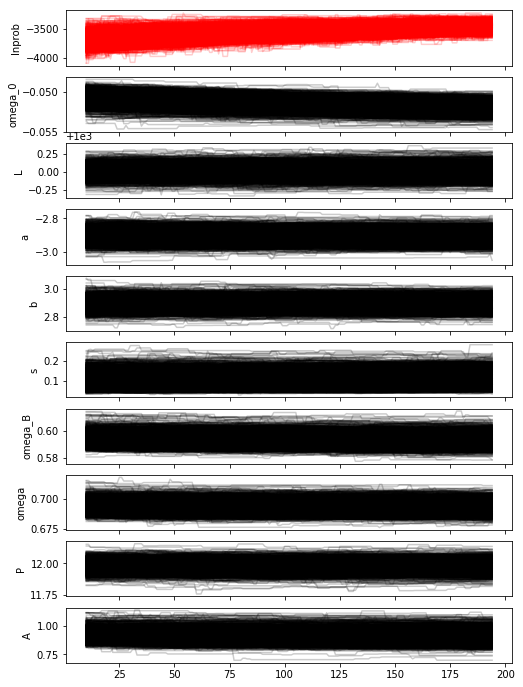


--The current time is Wed Aug  1 09:59:53 2018
  steps done = 213
  steps 2ref = 335
  steps left = 1787
   step time = 1.92s
         ETA = Wed Aug  1 10:56:58 2018

--The current time is Wed Aug  1 10:00:53 2018
  steps done = 244
  steps 2ref = 304
  steps left = 1756
   step time = 1.94s
         ETA = Wed Aug  1 10:57:32 2018

--The current time is Wed Aug  1 10:01:54 2018
  steps done = 275
  steps 2ref = 273
  steps left = 1725
   step time = 1.95s
         ETA = Wed Aug  1 10:58:03 2018

--The current time is Wed Aug  1 10:02:53 2018
  steps done = 305
  steps 2ref = 243
  steps left = 1695
   step time = 1.96s
         ETA = Wed Aug  1 10:58:12 2018

--The current time is Wed Aug  1 10:03:51 2018
  steps done = 335
  steps 2ref = 213
  steps left = 1665
   step time = 1.94s
         ETA = Wed Aug  1 10:57:42 2018

--The current time is Wed Aug  1 10:04:49 2018
  steps done = 365
  steps 2ref = 183
  steps left = 1635
   step time = 1.94s
         ETA = Wed Aug  1 10:57:48 201

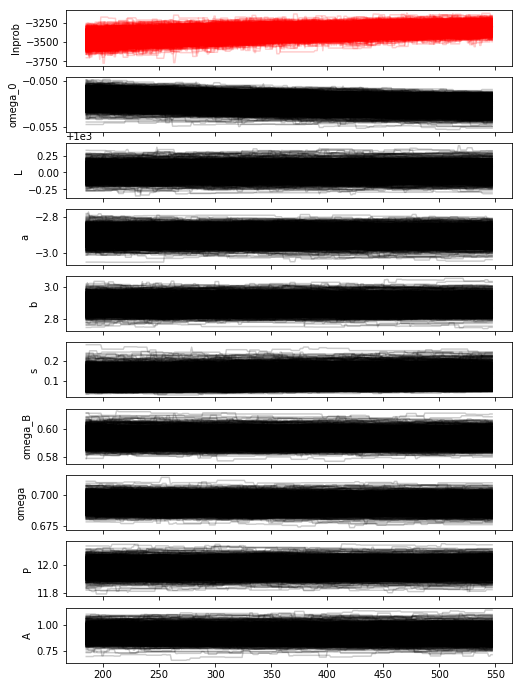


--The current time is Wed Aug  1 10:11:52 2018
  steps done = 567
  steps 2ref = 344
  steps left = 1433
   step time = 2.02s
         ETA = Wed Aug  1 11:00:04 2018

--The current time is Wed Aug  1 10:12:48 2018
  steps done = 596
  steps 2ref = 315
  steps left = 1404
   step time = 1.94s
         ETA = Wed Aug  1 10:58:11 2018

--The current time is Wed Aug  1 10:13:46 2018
  steps done = 626
  steps 2ref = 285
  steps left = 1374
   step time = 1.95s
         ETA = Wed Aug  1 10:58:20 2018

--The current time is Wed Aug  1 10:14:45 2018
  steps done = 656
  steps 2ref = 255
  steps left = 1344
   step time = 1.97s
         ETA = Wed Aug  1 10:58:50 2018

--The current time is Wed Aug  1 10:15:43 2018
  steps done = 686
  steps 2ref = 225
  steps left = 1314
   step time = 1.92s
         ETA = Wed Aug  1 10:57:50 2018

--The current time is Wed Aug  1 10:16:43 2018
  steps done = 717
  steps 2ref = 194
  steps left = 1283
   step time = 1.93s
         ETA = Wed Aug  1 10:57:58 201

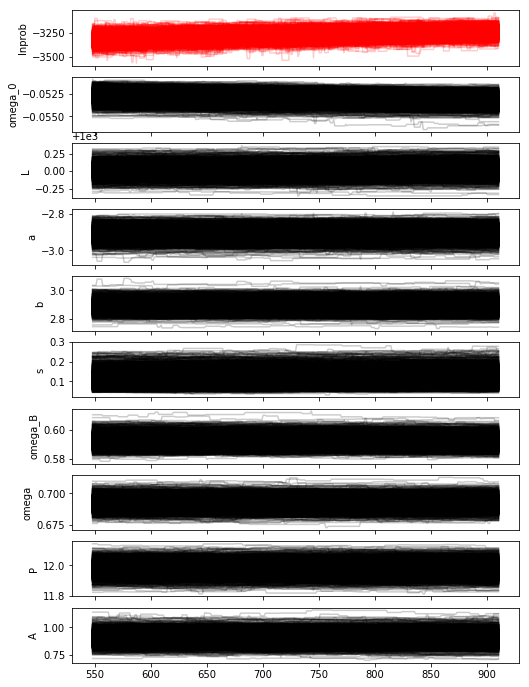


--The current time is Wed Aug  1 10:24:20 2018
  steps done = 939
  steps 2ref = 335
  steps left = 1061
   step time = 1.88s
         ETA = Wed Aug  1 10:57:37 2018

--The current time is Wed Aug  1 10:25:19 2018
  steps done = 970
  steps 2ref = 304
  steps left = 1030
   step time = 1.91s
         ETA = Wed Aug  1 10:58:10 2018

--The current time is Wed Aug  1 10:26:18 2018
  steps done = 1001
  steps 2ref = 273
  steps left = 999
   step time = 1.90s
         ETA = Wed Aug  1 10:58:01 2018

--The current time is Wed Aug  1 10:27:18 2018
  steps done = 1032
  steps 2ref = 242
  steps left = 968
   step time = 1.92s
         ETA = Wed Aug  1 10:58:17 2018

--The current time is Wed Aug  1 10:28:17 2018
  steps done = 1063
  steps 2ref = 211
  steps left = 937
   step time = 1.92s
         ETA = Wed Aug  1 10:58:16 2018

--The current time is Wed Aug  1 10:29:17 2018
  steps done = 1094
  steps 2ref = 180
  steps left = 906
   step time = 1.93s
         ETA = Wed Aug  1 10:58:26 201

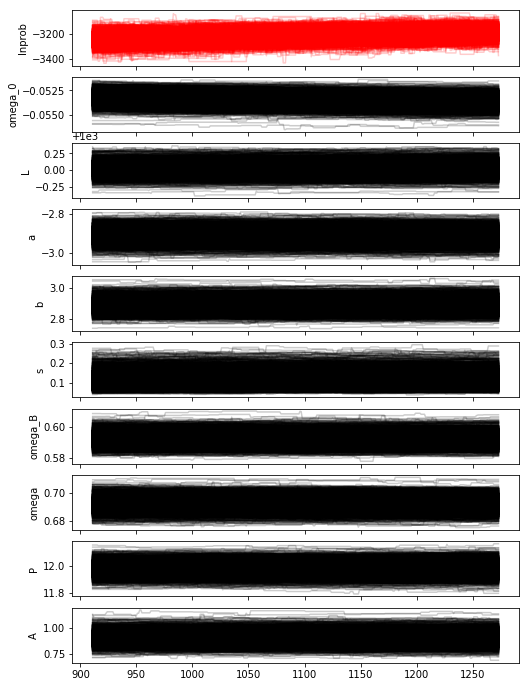


--The current time is Wed Aug  1 10:36:22 2018
  steps done = 1304
  steps 2ref = 333
  steps left = 696
   step time = 1.87s
         ETA = Wed Aug  1 10:58:06 2018

--The current time is Wed Aug  1 10:37:24 2018
  steps done = 1336
  steps 2ref = 301
  steps left = 664
   step time = 1.95s
         ETA = Wed Aug  1 10:58:56 2018

--The current time is Wed Aug  1 10:38:21 2018
  steps done = 1366
  steps 2ref = 271
  steps left = 634
   step time = 1.90s
         ETA = Wed Aug  1 10:58:29 2018

--The current time is Wed Aug  1 10:39:22 2018
  steps done = 1397
  steps 2ref = 240
  steps left = 603
   step time = 1.97s
         ETA = Wed Aug  1 10:59:11 2018

--The current time is Wed Aug  1 10:40:23 2018
  steps done = 1427
  steps 2ref = 210
  steps left = 573
   step time = 2.02s
         ETA = Wed Aug  1 10:59:43 2018

--The current time is Wed Aug  1 10:41:21 2018
  steps done = 1456
  steps 2ref = 181
  steps left = 544
   step time = 1.99s
         ETA = Wed Aug  1 10:59:22 201

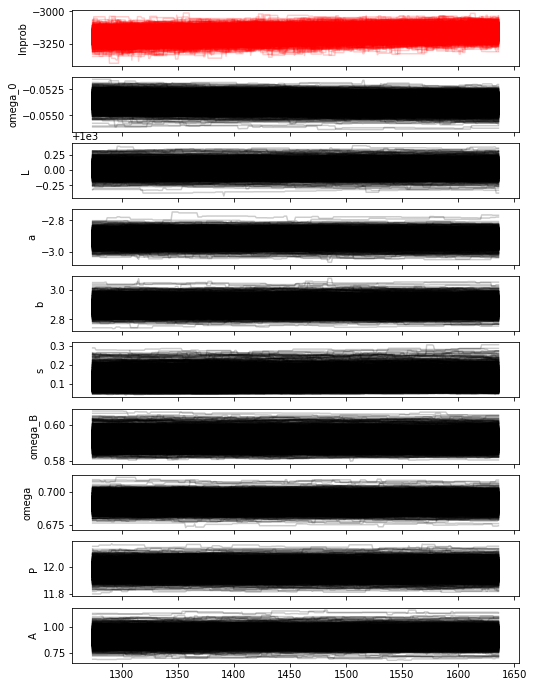


--The current time is Wed Aug  1 10:48:15 2018
  steps done = 1653
  steps 2ref = 347
  steps left = 347
   step time = 2.03s
         ETA = Wed Aug  1 10:59:58 2018

--The current time is Wed Aug  1 10:49:12 2018
  steps done = 1682
  steps 2ref = 318
  steps left = 318
   step time = 1.97s
         ETA = Wed Aug  1 10:59:39 2018

--The current time is Wed Aug  1 10:50:11 2018
  steps done = 1712
  steps 2ref = 288
  steps left = 288
   step time = 1.96s
         ETA = Wed Aug  1 10:59:37 2018

--The current time is Wed Aug  1 10:51:09 2018
  steps done = 1742
  steps 2ref = 258
  steps left = 258
   step time = 1.94s
         ETA = Wed Aug  1 10:59:31 2018

--The current time is Wed Aug  1 10:52:10 2018
  steps done = 1772
  steps 2ref = 228
  steps left = 228
   step time = 2.01s
         ETA = Wed Aug  1 10:59:49 2018

--The current time is Wed Aug  1 10:53:06 2018
  steps done = 1801
  steps 2ref = 199
  steps left = 199
   step time = 1.95s
         ETA = Wed Aug  1 10:59:34 201

In [142]:
%time run_emcee_for_me(sampler, reset=True, steps=2000, end_time=2.0, plot_chains_on_refresh=True)

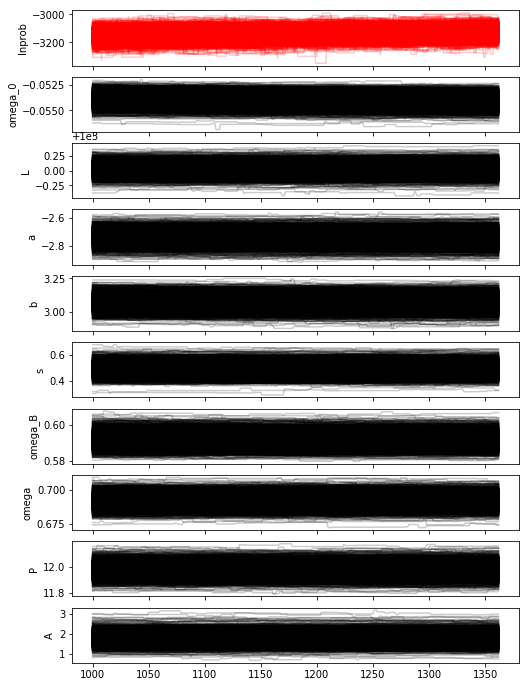

0    1.32666
Name: A_true_I, dtype: float64

In [207]:
# Change me
star_to_try = 0
binary_to_try = 0
band_to_try = 'I'

# Plot chains output
plot_chains(sampler, ranges, data_emcee, star=star_to_try, 
            binary_star=binary_to_try, band=band_to_try, step_0=1000)

data.iloc[[star_to_try]]['A_true_' + band_to_try]

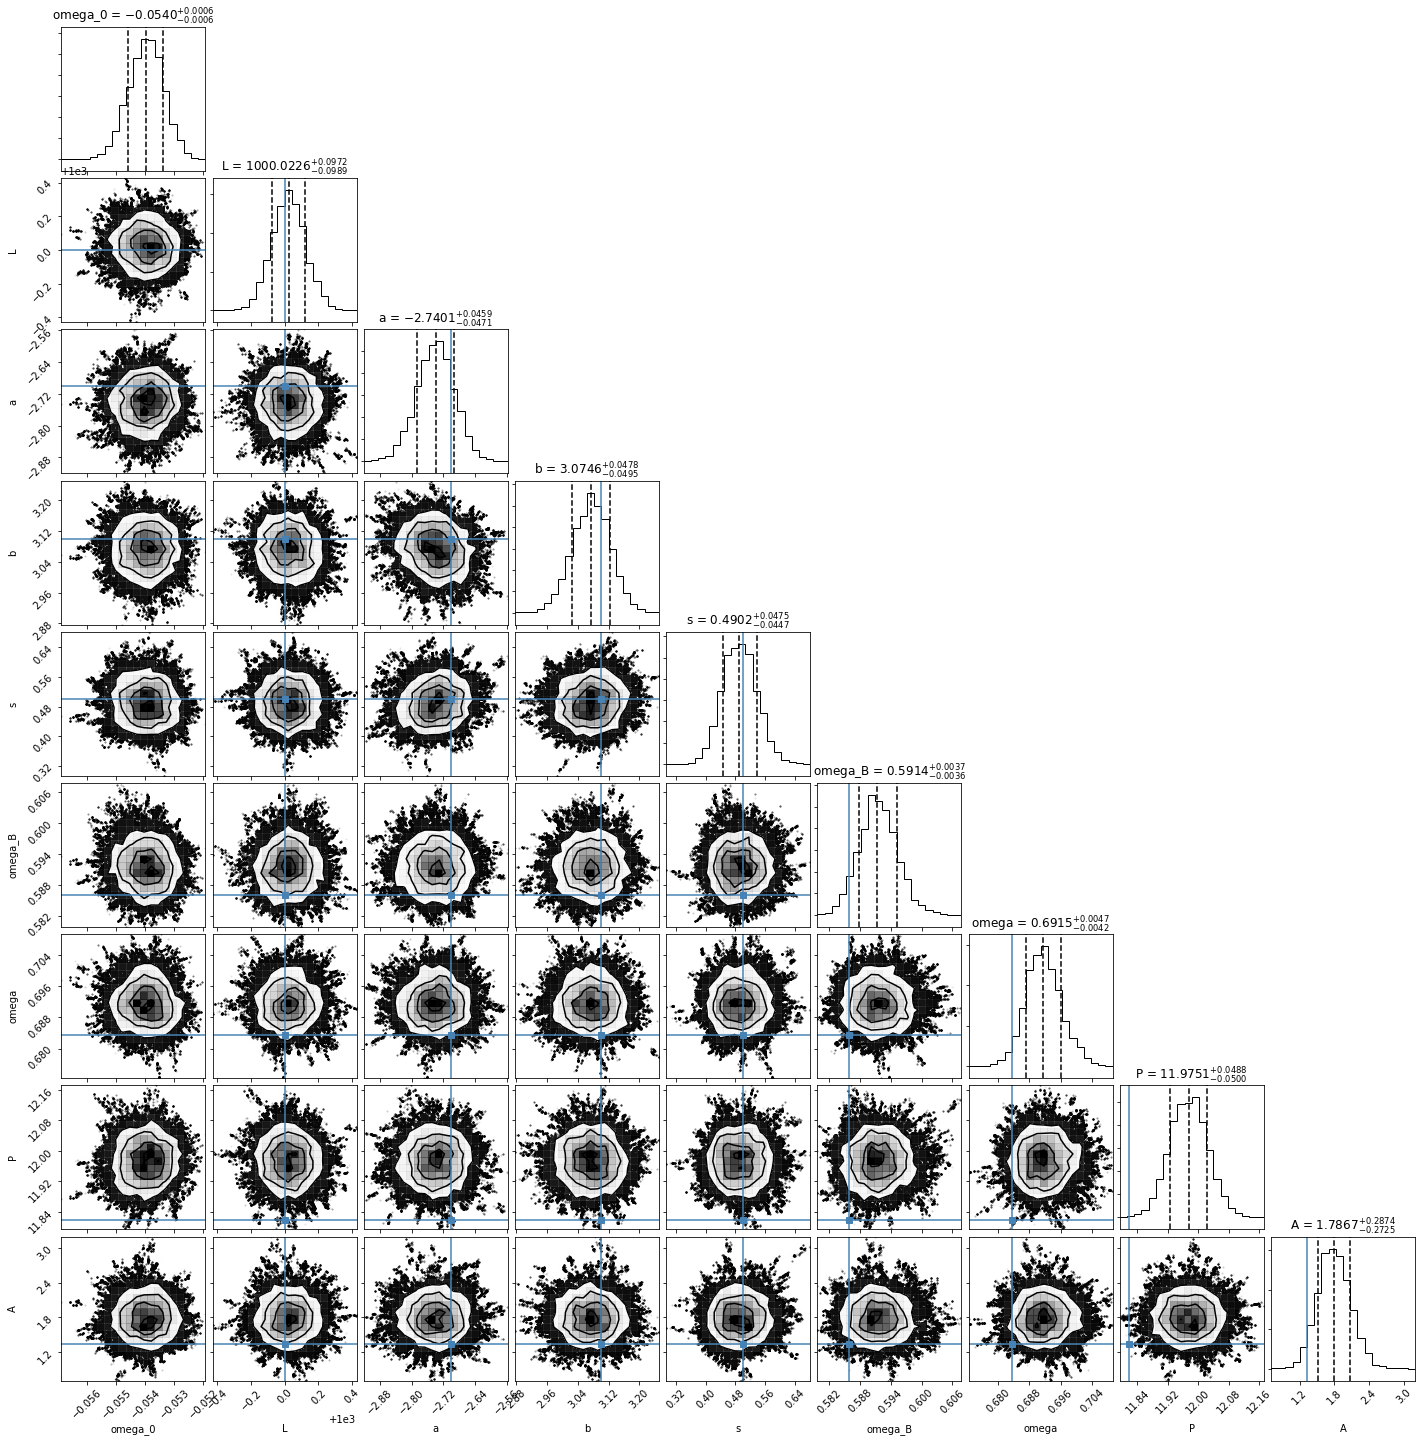

,omega_true,omega_exp,omega_sigma,P_true,P_exp,P_sigma,A_true_I,A_exp_I,m_true_I,m_exp_I
0,0.683505,0.634421,0.002849,11.818116,11.980908,0.179714,1.32666,0.669912,12.468139,12.461703


In [208]:
# Change me
star_to_try = 0
binary_to_try = 0
band_to_try = 'I'

# Make a corner plot
plot_corner(sampler, ranges, data_emcee, star=star_to_try, 
            binary_star=binary_to_try, band=band_to_try)

# Get data on star star_to_try
data.iloc[[star_to_try]][['omega_true', 'omega_exp', 'omega_sigma', 'P_true', 
                          'P_exp', 'P_sigma', 'A_true_' + band_to_try, 
                          'A_exp_' + band_to_try, 'm_true_' + band_to_try,
                          'm_exp_' + band_to_try]]

In [145]:
data.iloc[[71]]

,ID,ra,dec,r_true,omega_true,P_true,s_true_E,M_true_E,A_true_E,m_true_E,...,P_inf_l,A_inf_E,A_inf_E_u,A_inf_E_l,A_inf_M,A_inf_M_u,A_inf_M_l,A_inf_I,A_inf_I_u,A_inf_I_l
71,71,71.537645,-87.014191,1721.702724,0.58082,13.41407,-0.090756,-0.460682,0.83418,11.553288,...,13.449571,0.844106,0.900028,0.8065,1.347992,1.523149,1.22845,2.145735,2.428091,1.949315


In [146]:
s_true

[0.1, 0.3, 0.5]

# Data saving and plotting
------
First, outline a way to convert back from the emcee format to a format for easy output and comparison.

## Function for computing sample quantiles

In [147]:
def calculate_corner_quantiles(sampler, ranges, data_emcee, data, start=False):
    """Computes requisite quantile levels for all parameters in the model,
    and outputs them to the original data DataFrame object as well as popping
    a, b, s etc parameters in a sensible output.
    """
    
    # Quantiles to work stuff out at. Currently set to the 1sigma level.
    quantiles = np.array([0.16, 0.50, 0.84])
    
    # Get all the parameter names we want to look at
    parameter_names = ['omega_inf', 'P_inf']
    for name in band_names:
        parameter_names.append('A_inf_' + name)
        
    # Initialise rows of the dataframe
    for name in parameter_names:
        data[name] = np.nan
        data[name + '_u'] = np.nan
        data[name + '_l'] = np.nan
    
    # Check if the user specified a start point to plot from
    # CURRENTLY NOT IMPLEMENTED
    if start != False:
        s = start
        print("START VALUES AREN'T IMPLEMENTED YET HERE sorry")
    else:
        s = 0
    
    # Loop over all parameters for stars
    for a_star in range(N_good):
        # We grab the original ID of the star so we can put it in the right
        # place in the original DataFrame. Any failed stars will shift the
        # order of everything a bit, making this necessary.
        a_star_ID = data_emcee['ID'][a_star]
        
        # Firstly, do the band independent bits
        # Omega
        data.loc[a_star_ID, 'omega_inf' + '_l'],\
            data.loc[a_star_ID, 'omega_inf'],\
            data.loc[a_star_ID, 'omega_inf' + '_u'] = \
            corner.quantile(sampler.flatchain[:, ranges['omega'][a_star]], 
                            quantiles)
            
        # Period
        data.loc[a_star_ID, 'P_inf' + '_l'],\
            data.loc[a_star_ID, 'P_inf'],\
            data.loc[a_star_ID, 'P_inf' + '_u'] = \
            corner.quantile(sampler.flatchain[:, ranges['P'][a_star]], 
                            quantiles)
        
        # Next, do the band dependent bits        
        for param_name, band_number in zip(parameter_names[2:], range(N_bands)):
            data.loc[a_star_ID, param_name + '_l'],\
                data.loc[a_star_ID, param_name],\
                data.loc[a_star_ID, param_name + '_u'] = \
                corner.quantile(sampler.flatchain[:, ranges['A'][a_star 
                    + N_good*band_number]], quantiles)
        
        # Update the user
        sys.stdout.write("\rProcessed star {}".format(a_star_ID))
        sys.stdout.flush()
        
    # Work out omega_0, L too
    #omega_0 = corner.quantile(sampler.flatchain[:, values[1]], quantiles)
    #L = corner.quantile(sampler.flatchain[:, values[2]], quantiles)
    sys.stdout.write("\rProcessing done =)")
    sys.stdout.flush()
    
    return [0, 0]

## Compare between true & inferred values

In [148]:
# Calculate inferred values and also get omega_0 and L
omega_0_inf, L_inf = calculate_corner_quantiles(sampler, ranges, 
                                                data_emcee, data)

Processing done =)

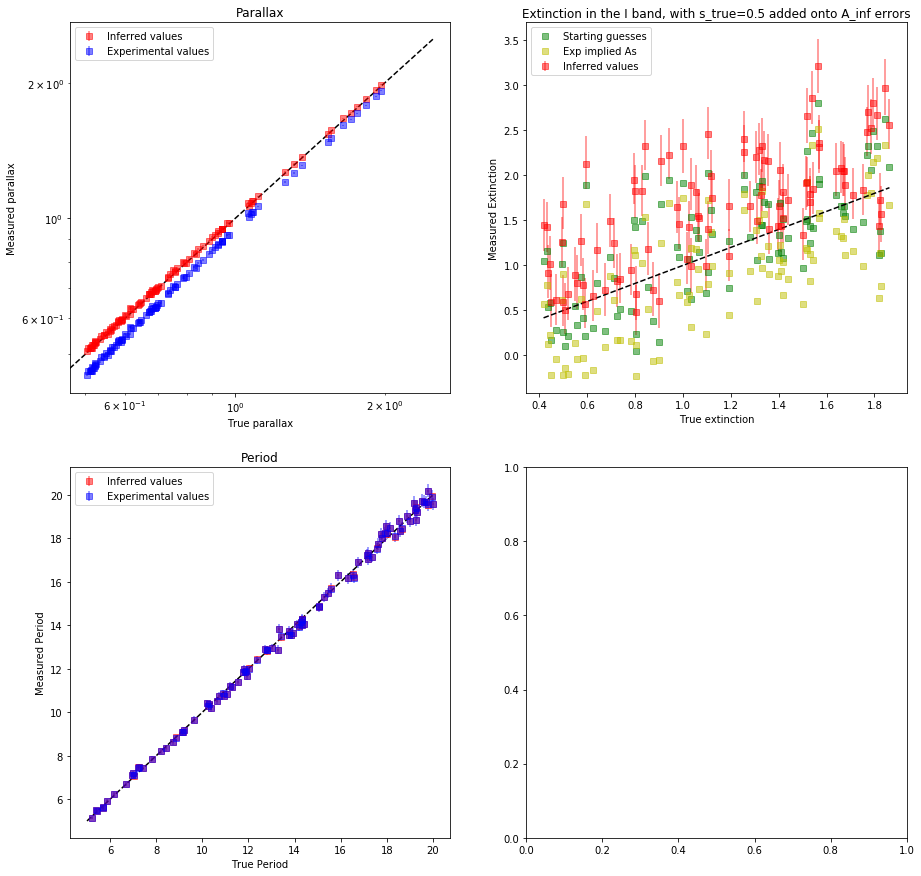

In [211]:
# Let's plot some comparisons on a 2x2 figure!
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

# Parallax

# Calculate lower and upper bounds, also set any NaNs to 0
inf_error = np.array([np.array(data['omega_inf'] - data['omega_inf_l']),
                      np.array(data['omega_inf_u'] - data['omega_inf'])])
inf_error = np.where(np.isfinite(inf_error), inf_error, 0)


ax[0][0].set_title('Parallax')
ax[0][0].set_xscale("log", nonposx='clip')
ax[0][0].set_yscale("log", nonposy='clip')

ax[0][0].errorbar(data['omega_true'], data['omega_inf'], 
                  yerr=inf_error,
                  fmt='sr', label='Inferred values', alpha=0.5
                 )
ax[0][0].errorbar(data['omega_true'], data['omega_exp'], 
                  yerr=data['omega_sigma'],
                  fmt='sb', label='Experimental values', alpha=0.5
                 )
ax[0][0].plot([0, 2.5], [0, 2.5], 'k--')
ax[0][0].set_xlabel('True parallax')
ax[0][0].set_ylabel('Measured parallax')
ax[0][0].legend()


# Extinction
band = 'I'
band_number = band_names.index(band)
band_s = s_true[band_number] * 0  # MAXIMUM CHEEKY x0 GOING ON HERE SHEEPLE
inf_error = np.array([np.array(data['A_inf_' + band] 
                               - data['A_inf_' + band + '_l']) + band_s,
                      np.array(data['A_inf_' + band + '_u'] 
                               - data['A_inf_' + band]) + band_s])
inf_error = np.where(np.isfinite(inf_error), inf_error, 0)

ax[0][1].set_title('Extinction in the {} band, with s_true={} added onto A_inf errors'.format(band, s_true[band_number]))
ax[0][1].errorbar(data['A_true_' + band], data['A_inf_' + band], 
                  yerr=inf_error,
                  fmt='sr', label='Inferred values', alpha=0.5
                 )
#ax[0][1].errorbar(data['A_true_' + band], data['A_exp_' + band], 
#                  yerr=data['A_sigma_' + band],
#                  fmt='sb', label='Experimental values', alpha=0.5
#                 )
ax[0][1].plot(data['A_true_' + band], 
              starting_guess[ranges['A'][band_number * N_good
                                         :(band_number+1) * N_good]],
              'sg', label='Starting guesses', alpha=0.5)

ax[0][1].plot(data['A_true_' + band], 
              data['m_exp_' + band] 
              - a_true[band_number] * np.log10(data['P_exp'])
              - b_true[band_number] + 5*np.log10(data['omega_exp']-0.05) -10,
              'sy', label='Exp implied As', alpha=0.5)

#ax[0][1].plot(data['A_true_' + band], 
#              data['m_true_' + band] 
#              - a_true[band_number] * np.log10(data['P_true'])
#              - b_true[band_number] + 5*np.log10(data['omega_true']) -10,
#              'sk', label='True implied As', alpha=0.5)


xmin = data['A_true_' + band].min()
xmax = data['A_true_' + band].max()

ax[0][1].plot([xmin, xmax], [xmin, xmax], 'k--')
ax[0][1].set_xlabel('True extinction')
ax[0][1].set_ylabel('Measured Extinction')
ax[0][1].legend()


# Period
inf_error = np.array([np.array(data['P_inf'] - data['P_inf_l']),
                      np.array(data['P_inf_u'] - data['P_inf'])])
inf_error = np.where(np.isfinite(inf_error), inf_error, 0)

ax[1][0].set_title('Period')
ax[1][0].errorbar(data['P_true'], data['P_inf'], 
                  yerr=inf_error,
                  fmt='sr', label='Inferred values', alpha=0.5
                 )
ax[1][0].errorbar(data['P_true'], data['P_exp'], 
                  yerr=data['P_sigma'],
                  fmt='sb', label='Experimental values', alpha=0.5
                 )
ax[1][0].plot([5, 20], [5, 20], 'k--')
ax[1][0].set_xlabel('True Period')
ax[1][0].set_ylabel('Measured Period')
ax[1][0].legend()


plt.show()




# Deprecated code

## Some testing of *s* parameter space

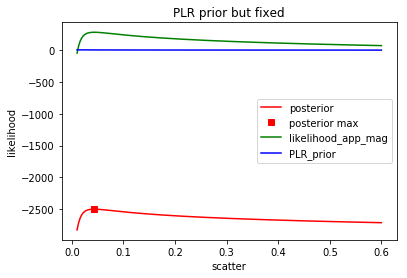

In [296]:
xran = np.linspace(0.01, 0.6, num=200)
yran = []
wran = []
zran = []
for a_scatter in xran:
    a_guess = starting_guess.copy()
    a_guess[ranges['s'][1]] = a_scatter
    yran.append(np.sum(posterior(a_guess, ranges, data_emcee, False)))
    wran.append(np.sum(likelihood_app_mag(a_guess, ranges, data_emcee, False)))
    zran.append(np.sum(prior_PLR(a_guess, ranges, False)))

max_yran = np.argmax(yran)
plt.plot(xran, yran, 'r-', label='posterior')
plt.plot(xran[max_yran], yran[max_yran], 'rs', label='posterior max')
plt.plot(xran, wran, 'g-', label='likelihood_app_mag')
plt.plot(xran, np.asarray(zran), 'b-', label='PLR_prior')
plt.legend()
plt.title('PLR prior but fixed')
plt.xlabel('scatter')
plt.ylabel('likelihood')
plt.show()

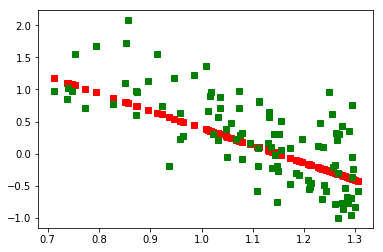

In [306]:
band_n=2
plt.plot(np.log10(data['P_exp']), a_true[band_n] * np.log10(data['P_exp']) + b_true[band_n], 'rs')
plt.plot(np.log10(data['P_exp']), data['M_true_I'], 'gs')
plt.show()

In [199]:
norm(loc=1, scale=0.5).pdf(1)

0.7978845608028654

## Some testing of *A* parameter space

In [184]:
# Constants
a_star = 30
a_band = 'I'

# Find the posterior at the starting guess
band_number = band_names.index(a_band)
points = 200
xran2 = np.linspace(0.4, 2.0, num=points)
yran = []
for a_A in xran:
    a_guess = starting_guess.copy()
    a_guess[ranges['A'][band_number * N_good + a_star]] = a_A
    yran.append(np.sum(posterior(a_guess, ranges, data_emcee, False)))

# Find the posterior for some random walkers
tests = 400
points = 25
xran2 = np.linspace(0.4, 2.0, num=points)
zran = np.zeros((tests, points))
guess_indices = np.random.randint(0, walkers, size=tests)
walker_guesses = sampler.chain[guess_indices, -1, :]
for a_A, i in zip(xran2, range(points)):
    walker_guesses[:, ranges['A'][band_number * N_good + a_star]] = a_A
    
    for j in range(tests):
        zran[j, i] = np.sum(posterior(walker_guesses[j], ranges, data_emcee, False))
    
    sys.stdout.write('\r{} of {}'.format(i+1, points))
    sys.stdout.flush()

24 of 25

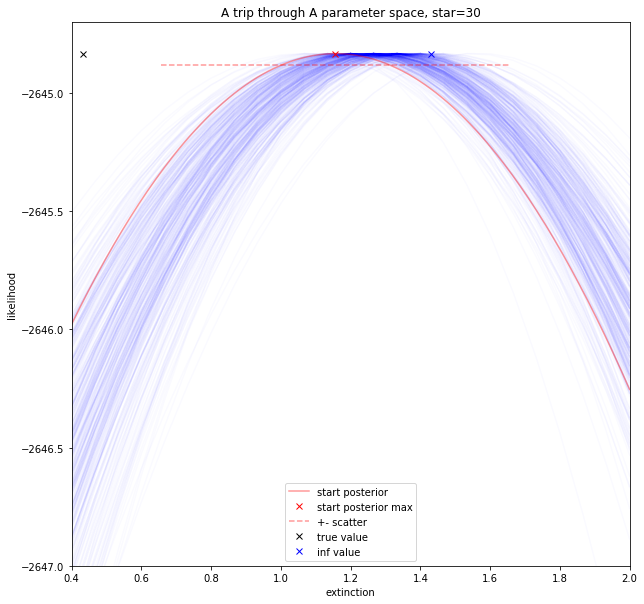

In [192]:
true_A = data.iloc[[a_star]]['A_true_' + a_band]
max_yran = np.amax(yran)
arg_max_yran = np.argmax(yran)

plot_offset = 450

plt.figure(figsize=(10,10))

for i in range(tests):
    max_zran = np.amax(zran[i, :])
    zran_offset = max_yran - max_zran
    plt.plot(xran2, zran[i, :] + zran_offset, 'b-', alpha=0.02)

plt.plot(xran, yran, 'r-', label='start posterior', alpha=0.4)
plt.plot(xran[arg_max_yran], yran[arg_max_yran], 'rx', label='start posterior max')
plt.plot([xran[arg_max_yran]-s_true[band_number], xran[arg_max_yran]+s_true[band_number]], 
         [yran[arg_max_yran]-0.05, yran[arg_max_yran]-0.05], 'r--', label='+- scatter', alpha=0.4)

plt.plot(true_A, yran[arg_max_yran], 'kx', label='true value')
plt.plot(data.iloc[[a_star]]['A_inf_' + a_band], yran[arg_max_yran], 'bx', 
         label='inf value')

#plt.plot(xran, np.asarray(zran), 'g-', label='likelihood_app_mag')
plt.plot()
plt.legend()
plt.title('A trip through A parameter space, star={}'.format(a_star))
plt.xlabel('extinction')
plt.ylabel('likelihood')
plt.xlim(0.4, 2.0)
plt.ylim(-2647, -2644.7)
plt.show()

## From the maximisation function

In [380]:
def maximise_likelihood(star, data, omega_0, L):
    """Maximises a given star's likelihood in order to find a good initial 
    guess at its parameters.
    
    Currently, this takes omega, omega_0, L, m and M values as given, and only 
    fits for A. This has, in the past, stopped the minimisation function
    from being a colossal prick
    
    If the function fails for whatever reason (usually because it can't stop 
    getting -np.inf for a given star,) then success will be set to False and 
    the star will not be added to the parameters to solve for. If this happens, 
    then the user should really try and work out why (and get the star working)
    before proceeding, to ensure that selection effects stemming from the
    effectiveness of this guesser do not appear in the final model.
    """
    # Assume we're gonna get through ok
    success = True
    
    # A synthetic ranges dictionary to trick posterior() into working
    ranges = {'omega':0,
              'omega_0':1,
              'L':2,
              'A':list(range(3, 3 + 1*N_bands)),
              'm':list(range(3 + 1*N_bands, 3 + 2*N_bands)),
              'M':list(range(3 + 2*N_bands, 3 + 3*N_bands))}
    
    # Set any -ve parallaxes to the PLR implied parallax
    if data['omega_exp'][a_star] <= 0:
        omega = np.power(10, (data['M_exp'][a_star] + data['A_exp'][a_star] 
                                  + 10 - data['m_exp'][a_star]) / 5)
    else:
        omega = data['omega_exp'][a_star]
    
    # Create other guess parameters
    A = data['A_exp'][a_star]
    m = data['m_exp'][a_star]
    M = data['M_exp'][a_star]   
    
    """Check for likelihood_app_mag infinity issues"""
    guess = np.array([omega, omega_0, L, A, m, M])
    likelihood_test = likelihood_app_mag(guess, ranges, data, debug=False)
    if np.isfinite(likelihood_test) == False or likelihood_test < -300:
        print("Star {} gives an instant inf. Attempting to fix.".format(star))
        
        # Slowly change the extinction to see if this fixes the problem
        counter = 1
        while True:
            guess[ranges['A']] += 0.001  
            
            new_likelihood_test = likelihood_app_mag(guess, ranges, data, 
                                                     debug=False)
            
            # If the extinction prior is now false, then I guess we've
            # totally failed to fix this star. =(
            if np.isfinite(prior_extinction(guess, ranges, 
                                            debug=False)) == False:
                print("Prior_extinction is now infinite. Star {} has failed\n"
                      .format(star)
                      + " after {} attempts.".format(counter))
                success = False
                break            
                
            # Otherwise, see if the likelihood is better now:
            elif (np.isfinite(new_likelihood_test) and new_likelihood_test < likelihood_test):
                print("likelihood_app_mag is now finite. Moving on...")
                guess[ranges['A']] -= 0.001  
                break
                
            # Otherwise, update a counter and try the loop again
            else:
                likelihood_test = new_likelihood_test
                counter += 1
                
    """Run scipy minimisation function"""
    if success:
        print("Minimising star {}...".format(star))

        # Remove omega_0, L, m and M from guess so that they're locked
        guess = np.array([omega, A])

        # Multiply the posterior by -1 when returning so that it's 
        # minimized, not maximized
        def function_to_minimize(params, omega_0, L, m, M, ranges, data):
            params = np.insert(params, 1, [omega_0, L])
            params = np.append(params, m)
            params = np.append(params, M)
            return -1 * posterior(params, ranges, data)

        # Actually do the scipy bit
        result = minimize(function_to_minimize, guess, 
                 args=(omega_0, L, m, M, ranges, data), 
                 method='Nelder-Mead',
                 options={'maxiter':2000})

        # 'result' is a scipy.optimize.OptimizeResult object that we need 
        # to split up
        omega = result.x[ranges['omega']]
        A = result.x[list(np.array(ranges['A']) - 2)]
        success = result.success
        
        a_posterior = -1 * function_to_minimize([omega, A], omega_0, 
                            L, m, M, ranges, data)
        
        if success and np.isfinite(a_posterior):
            print("  minimised star {}. Posterior = {}. Omega = {}. A = {}\n"
                  .format(star, a_posterior, omega, A))
        else:
            print("Minimisation failed on star {} after ??? iterations =(\n"
                  .format(star))
    
    return [success, omega, A, m, M]

## More from the maximisation function (how it was at the start of batdog_begins)

In [162]:
def maximise_likelihood(star, data, omega_0, L):
    """Maximises a given star's likelihood in order to find a good initial 
    guess at its parameters.
    
    Currently, this takes omega, omega_0, L, m and M values as given, and only 
    fits for A. This has, in the past, stopped the minimisation function
    from being a colossal prick
    
    If the function fails for whatever reason (usually because it can't stop 
    getting -np.inf for a given star,) then success will be set to False and 
    the star will not be added to the parameters to solve for. If this happens, 
    then the user should really try and work out why (and get the star working)
    before proceeding, to ensure that selection effects stemming from the
    effectiveness of this guesser do not appear in the final model.
    """
    # Console output
    print("\n> Creating a guess for star {}".format(star))
    
    # Assume failure because I have to typecast this.. somewhere. Why not here?
    A_success = False
       
    # Get input parameters to use from data
    A = data['A'][:, star]
    P = data['P'][star]
    m = data['A'][:, star]
    
    
    """Solve for parallax"""
    # We calculate good input data for scipy, and then feed this to the
    # minimisation method.
    def function_to_minimize(omega, omega_0, L, A, m, M, ranges, data):
        """Minimisation function for use with scipy. We multiply by -1 so 
        we're minimising, not maximising!
        """
        # Pop everything in a np.array to interface with existing fns
        params = np.array([omega, omega_0, L, A, m, M])

        return -1*(np.sum(likelihood_parallax(params, ranges, data, True)) 
                   + np.sum(prior_parallax(params, ranges, True)))
    
    # Calculate different initial estimates of the parallax & their probability
    omega_exp = data['omega_exp'][star]
    omega_PLR = np.power(10, (data['M_exp'][a_star] + data['A_exp'][a_star] 
                                  + 10 - data['m_exp'][a_star]) / 5)
    omega_prior = 1/(2*L) * 1e3
    prob_exp = function_to_minimize(omega_exp, omega_0, L, 
                                    A, m, M, ranges, data)
    prob_PLR = function_to_minimize(omega_PLR, omega_0, L, 
                                    A, m, M, ranges, data)
    prob_prior = function_to_minimize(omega_prior, omega_0, L, 
                                      A, m, M, ranges, data)
    
    # Minimise with the most likely 
    if prob_exp < prob_PLR and prob_exp < prob_prior and np.isfinite(prob_exp):
        print("    using experimental parallax value for first guess")
        omega = omega_exp
        omega_success = True
    elif prob_PLR < prob_prior and np.isfinite(prob_PLR):
        print("    using PLR parallax value for first guess")
        omega = omega_PLR
        omega_success = True
    elif np.isfinite(prob_prior):
        print("    using prior parallax value for first guess")
        omega = omega_prior
        omega_success = True
        
    # If all else fails, brute force through parameter space to try and find
    # a value to use. Ranges need setting manually.
    else:
        print("    ah shit nothing has worked yet")
        print("    gonna do this the hard way with 1000 samples...")
        omega_sampled = np.linspace(0.001, 2.0, num=1000)
        prob_sampled = []
        for i in omega_sampled:
            params = np.array([i, 0.0, 1000.0, 0.0, 0.0, 0.0])
            prob_sampled.append(function_to_minimize(i, omega_0, L, 
                                                     A, m, M, ranges, data))
        
        # See if *literally any* of the values are good
        if np.any(np.isfinite(prob_sampled)):
            print("    using sampled parallax value for first guess")
            index_of_minimum = np.argmin(prob_sampled)
            omega = omega_sampled[index_of_minimum]
            omega_success = True
        else:
            print("~~~ failed to make initial omega guess =(")
            omega_success = False
        
    # Minimise with scipy if the above worked and we have a good initial guess
    if omega_success:
        result = minimize(function_to_minimize, omega, 
                          args=(omega_0, L, A, m, M, ranges, data), 
                          method='Nelder-Mead',
                          options={'maxiter':2000, 'disp':True})
    
        # Pull the results out of result, which is a 
        # scipy.optimize.OptimizeResult object that needs care, love, 
        # attention, and the US spelling of optimise
        omega_success = result.success

        # Tell the user that everything went well (hopefully (maybe))
        if omega_success:
            omega_guess = result.x
            print("    guessed omega at {}".format(omega_guess))
        else:
            print("~~~ scipy failed to guess omega =(")
    
    
    """Solve for extinction"""
    # This is easily done with the PLR relationship and using the guessed
    # parallax above to infer an extinction value.
    if omega_success:
        A_guess = m - M - 10 + 5*np.log10(omega_guess)
        print("    guessed A at {}".format(A_guess))
        print("    original A was {}".format(data['A_exp'][star]))
        
        # Check that the posterior for this star isn't something stupid
        # If it is, then we've fucked up lol
        params_guess = np.array([omega_guess, omega_0, L, A_guess, m, M])
        posterior_guess = posterior(params_guess, ranges, data, debug=True)
        A_success = np.isfinite(posterior_guess)
        print("    posterior evaluates to {}".format(posterior_guess))
        
        if A_success == False:
            print("~~~ failed to guess A due to poor posterior")   
    
    
    """Return result"""
    if A_success:
        print("    storing this good result for star {}".format(star))
        return [omega_guess, A_guess, m, M]
        
    else:
        print("~~~ star {} will not be stored in the final model".format(star))
        return [False]

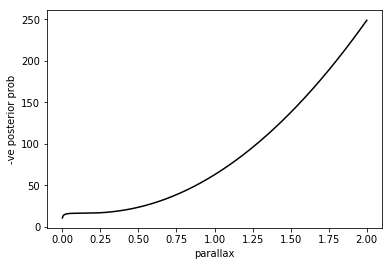

In [172]:
ranges = {'omega':0,
          'omega_0':1,
          'L':2,
          'A':list(range(3, 3 + 1*N_bands)),
          'm':list(range(3 + 1*N_bands, 3 + 2*N_bands)),
          'M':list(range(3 + 2*N_bands, 3 + 3*N_bands))}

a_star = 33

##############

some_data = data.iloc[[a_star]]
a_A = some_data['A_exp'][a_star]
a_m = some_data['m_exp'][a_star]
a_M = some_data['M_exp'][a_star]

xrange = np.linspace(0.001, 2.0, num=1000)
yrange = []
for i in xrange:
    params = np.array([i, 0.0, 1000.0, 0.0, 0.0, 0.0])
    yrange.append(-1*(np.sum(likelihood_parallax(params, ranges, some_data, True)) 
                   + np.sum(prior_parallax(params, ranges, True))))
    
plt.plot(xrange, yrange, 'k-')
plt.xlabel('parallax')
plt.ylabel('-ve posterior prob')
plt.show()


## Run the maximisation function for all stars

In [167]:
# Define ranges that will be where data is stored in the overall
# mcmc position vector.

guess_omega = []
guess_A = []
guess_m = []
guess_M = []
guess_successes = []
guess_fails = []

# Cycle over all stars and get guesses on their parameters
for a_star in range(N):
    maximisation_result = maximise_likelihood(a_star, data.iloc[[a_star]],
                                              guess_omega_0, guess_L)
    
    # Only add the star to the parameter set if it's not going to cause issues.
    # We ascertain this with np.any(), which returns False for [False] (as the 
    # single array element in that isn't true)
    if np.any(maximisation_result):
        guess_omega.append(maximisation_result[0])
        guess_A.append(maximisation_result[1])
        guess_m.append(maximisation_result[2])
        guess_M.append(maximisation_result[3])
        guess_successes.append(a_star)
    else:
        guess_fails.append(a_star)

print('All done! We failed {} times.'.format(len(guess_fails)))


> Creating a guess for star 0
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 17.462566
         Iterations: 10
         Function evaluations: 20
    guessed omega at [0.57986574]
    guessed A at [1.08599221]
    original A was 0.8896045984425304
    posterior evaluates to -10.334307268996515
    storing this good result for star 0

> Creating a guess for star 1
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 18.137256
         Iterations: 10
         Function evaluations: 20
    guessed omega at [0.76338401]
    guessed A at [1.976072]
    original A was 1.5387955952605645
    posterior evaluates to -13.276337638793482
    storing this good result for star 1

> Creating a guess for star 2
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 14.844119
         I

/u/h/eh594/.conda/envs/emily3/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log



    guessed omega at [0.24915696]
    guessed A at [2.18889264]
    original A was 1.2242519253636444
    posterior evaluates to -11.069788450392316
    storing this good result for star 7

> Creating a guess for star 8
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 16.757386
         Iterations: 9
         Function evaluations: 18
    guessed omega at [0.464878]
    guessed A at [1.92226384]
    original A was 1.5330862335554545
    posterior evaluates to -9.636968223249294
    storing this good result for star 8

> Creating a guess for star 9
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 16.666752
         Iterations: 9
         Function evaluations: 18
    guessed omega at [0.47155286]
    guessed A at [1.31159256]
    original A was 0.7331084931731461
    posterior evaluates to -9.83673980551529
    storing this good result fo

Optimization terminated successfully.
         Current function value: 10.509467
         Iterations: 23
         Function evaluations: 46
    guessed omega at [0.00050143]
    guessed A at [-11.1951979]
    original A was 0.7143572367220545

prior_extinction encountered infs in:
(array([0]),)
    posterior evaluates to -inf
~~~ failed to guess A due to poor posterior
~~~ star 33 will not be stored in the final model

> Creating a guess for star 34
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 16.286517
         Iterations: 9
         Function evaluations: 18
    guessed omega at [0.42090971]
    guessed A at [1.9548167]
    original A was 1.1749025876386152
    posterior evaluates to -10.404522161291164
    storing this good result for star 34

> Creating a guess for star 35

likelihood_parallax encountered infs in:
(array([0]),)
    using experimental parallax value for first guess
Optimization terminated 

Optimization terminated successfully.
         Current function value: 17.556038
         Iterations: 10
         Function evaluations: 20
    guessed omega at [0.69711892]
    guessed A at [1.49936081]
    original A was 0.9074466029426809
    posterior evaluates to -13.430108752040343
    storing this good result for star 61

> Creating a guess for star 62
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 15.455422
         Iterations: 9
         Function evaluations: 18
    guessed omega at [0.2757178]
    guessed A at [0.50890745]
    original A was 0.31484434906427816
    posterior evaluates to -8.95072440882705
    storing this good result for star 62

> Creating a guess for star 63
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 15.334695
         Iterations: 9
         Function evaluations: 18
    guessed omega at [0.28006289]
 

    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 16.222425
         Iterations: 9
         Function evaluations: 18
    guessed omega at [0.33155923]
    guessed A at [0.87401566]
    original A was 0.6530081631504009
    posterior evaluates to -10.777455070876172
    storing this good result for star 79

> Creating a guess for star 80
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 14.837501
         Iterations: 8
         Function evaluations: 16
    guessed omega at [0.19624982]
    guessed A at [0.59852027]
    original A was 0.3379103267555543
    posterior evaluates to -9.558340529885207
    storing this good result for star 80

> Creating a guess for star 81

likelihood_parallax encountered infs in:
(array([0]),)

likelihood_parallax encountered infs in:
(array([0]),)
    using experimental parallax value for first guess
Optimiz

Optimization terminated successfully.
         Current function value: 16.735301
         Iterations: 13
         Function evaluations: 26
    guessed omega at [1.39795912]
    guessed A at [1.46902115]
    original A was 0.8696739177212992
    posterior evaluates to -10.83943525594211
    storing this good result for star 97

> Creating a guess for star 98
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 17.060137
         Iterations: 9
         Function evaluations: 18
    guessed omega at [0.47793537]
    guessed A at [0.40481861]
    original A was 0.16956816999053828
    posterior evaluates to -10.29733296920159
    storing this good result for star 98

> Creating a guess for star 99
    using experimental parallax value for first guess
Optimization terminated successfully.
         Current function value: 16.218853
         Iterations: 9
         Function evaluations: 18
    guessed omega at [0.31454607]


In [178]:
data.iloc[[47]]

,ID,ra,dec,r_true,omega_true,P_true,s_true,M_true,A_true,m_true,omega_exp,omega_sigma,m_exp,m_sigma,A_exp,A_sigma,P_exp,P_sigma,M_exp,M_sigma
47,47,173.806324,-61.025872,3829.266374,0.261147,18.728441,0.0,2.264246,0.327156,15.50698,0.253377,0.018816,15.506086,0.001341,0.178841,0.143073,18.618057,0.110836,2.271177,0.047001


In [168]:
guess_fails

[33, 72]

In [20]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Test of how matrices work in numpy

In [9]:
hi = np.array([[2, 2], 
               [0, 0],
               [-2, -2]])

me = np.array([1, 3])

hi * me

array([[ 2,  6],
       [ 0,  0],
       [-2, -6]])

## Old ranges code

In [ ]:
ranges = {'omega':list(range(0,N_good)),
          'omega_0':N_good,
          'L':N_good+1,
          'A':list(range(N_good+2, N_good+2 + 1*N_good*N_bands)),
          'm':list(range(N_good+2 + 1*N_good*N_bands, N_good+2 + 2*N*N_bands)),
          'M':list(range(N_good+2 + 2*N_good*N_bands, N_good+2 + 3*N*N_bands))}

The Gaussian sum way of doing things (sucks)

In [151]:
N_points = 300
test_r = np.linspace(30000, 70000, num=N_points)

a_star = 0
likelihood = np.zeros(N_points)

# Cycle along the beam
r_i = 0
for a_r in zip(test_r):
    sys.stdout.write('\r{}'.format(r_i))
    sys.stdout.flush()
    # Evaluate stars at beam test points
    for along, a_weight in zip(distances_along_beam[a_star], star_weights[a_star]):
        likelihood[r_i] += norm(along, data_prior['r_sigma'][a_star]).pdf(a_r) * a_weight
    r_i += 1

299

## Some code for a different parallax prior using stars as Gaussians, not points

The Gaussian sum way of doing things (sucks - it doesn't retrieve the shape of the distribution properly, and just spends ages to return a Gaussian centred on the mean distance. I think this would only work if star positional errors were very small. Also it's coded terribly, it takes fucking forever. For loops suck!)

In [151]:
N_points = 300
test_r = np.linspace(30000, 70000, num=N_points)

a_star = 0
likelihood = np.zeros(N_points)

# Cycle along the beam
r_i = 0
for a_r in zip(test_r):
    sys.stdout.write('\r{}'.format(r_i))
    sys.stdout.flush()
    # Evaluate stars at beam test points
    for along, a_weight in zip(distances_along_beam[a_star], star_weights[a_star]):
        likelihood[r_i] += norm(along, data_prior['r_sigma'][a_star]).pdf(a_r) * a_weight
    r_i += 1

299